## Librerias

In [562]:
import pandas as pd

from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Funciones

In [313]:
def moving_average(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
  MA = pd.DataFrame(MA)
  MA = pd.concat([MA.loc[1], MA])
  MA = MA.reset_index()
  MA = MA.drop([0,'index'], axis=1)
  df = df.join(MA)
  return df

In [314]:
def exponential_moving_average(df, n):
  EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
  EMA = pd.DataFrame(EMA)
  EMA = pd.concat([EMA.loc[1], EMA])
  EMA = EMA.reset_index()
  EMA = EMA.drop([0,'index'], axis=1)
  df = df.join(EMA)
  return df

In [315]:
def momentum(df, n):
  M = pd.Series(df['Close'].diff(n), name="Momentum_"+str(n))
  M = pd.DataFrame(M)
  M = pd.concat([M.loc[1], M])
  M = M.reset_index()
  M = M.drop([0,'index'], axis=1)
  df = df.join(M)
  return df

In [316]:
def bollinger_bands(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
  MSD = pd.Series(df['Close'].rolling(n, min_periods=n).std())
  b1 = 4 * MSD / MA
  B1 = pd.Series(b1, name = "BollingerB_" + str(n))
  B1 = pd.DataFrame(B1)
  B1 = pd.concat([B1.loc[1], B1])
  B1 = B1.reset_index()
  B1 = B1.drop([0,'index'], axis=1)
  df = df.join(B1)
  b2 = (df['Close'] - MA  + 2 * MSD) / (4 * MSD)
  B2 = pd.Series(b2, name='Bollinger%b_'+str(n))
  B2 = pd.DataFrame(B2)
  B2 = pd.concat([B2.loc[1], B2])
  B2 = B2.reset_index()
  B2 = B2.drop([0,'index'], axis=1)
  df = df.join(B2)
  return df

In [317]:
def stochastic_oscillator(df ,n):
  S0K = pd.Series((df['Close']- df['Low']) / (df['High']-df['Low']), name='S0k_' + str(n))
  S0K = pd.DataFrame(S0K)
  S0K = pd.concat([S0K.loc[1], S0K])
  S0K = S0K.reset_index()
  S0K = S0K.drop([0,'index'], axis=1)
  df = df.join(S0K)
  return df

In [318]:
def relative_strength_index(df, n):
  i = 0
  UpI = [0]
  DoI = [0]

  while i + 1 <= df.index[-1]:
    UpMove = df.loc[i+1, 'High'] - df.loc[i, 'High']
    DoMove = df.loc[i+1, 'Low'] - df.loc[i, 'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else:
      UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else:
      DoD = 0
    DoI.append(DoD)
    i = i + 1

  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  RSI = pd.DataFrame(RSI)
  RSI = pd.concat([RSI.loc[1], RSI])
  RSI = RSI.reset_index()
  RSI = RSI.drop([0,'index'], axis=1)
  df = df.join(RSI)
  return df

In [319]:
def common_channel_index(df, n):
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(), name='CCI_' + str(n))
  CCI = pd.DataFrame(CCI)
  CCI = pd.concat([CCI.loc[1], CCI])
  CCI = CCI.reset_index()
  CCI = CCI.drop([0,'index'], axis=1)
  df = df.join(CCI)
  return df

In [320]:
def standart_deviation(df, n):
  hola = pd.Series(df['Close'].rolling(n, min_periods=n).std(), name='STD_' + str(n))
  hola = pd.DataFrame(hola)
  hola = pd.concat([hola.loc[1], hola])
  hola = hola.reset_index()
  hola = hola.drop([0,'index'], axis=1)
  df.join(hola)
  return df

## Dataframe

In [321]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia artificial/Bitcoin/df_V3.csv')

In [322]:
df

Unnamed: 0  Unnamed: 0.1   Open Time  ...   CCI_300      PIB       CPI
0              0             0  2015-10-11  ...  0.000000  54420.0 -0.044968
1              1             1  2015-10-12  ...  0.000000  54420.0 -0.044968
2              2             2  2015-10-13  ...  0.000000  54420.0 -0.044968
3              3             3  2015-10-14  ...  0.000000  54420.0 -0.044968
4              4             4  2015-10-15  ...  0.000000  54420.0 -0.044968
...          ...           ...         ...  ...       ...      ...       ...
2014        2014          2014  2021-04-16  ...  2.155158  56812.0  0.547438
2015        2015          2015  2021-04-17  ...  2.054954  56812.0  0.547438
2016        2016          2016  2021-04-18  ...  1.982619  56812.0  0.547438
2017        2017          2017  2021-04-19  ...  1.695163  56812.0  0.547438
2018        2018          2018  2021-04-20  ...  1.677126  56812.0  0.547438

[2019 rows x 108 columns]

In [323]:
df2 = df.drop(['Open','Unnamed: 0.1','High','Low','Unnamed: 0'], axis=1)

In [324]:
df2['fecha'] = pd.to_datetime(df['Open Time'])

In [325]:
df2

Open Time     Close         Volume  ...      PIB       CPI      fecha
0     2015-10-11    249.50    3021.120000  ...  54420.0 -0.044968 2015-10-11
1     2015-10-12    247.60    9493.890000  ...  54420.0 -0.044968 2015-10-12
2     2015-10-13    250.00   12875.400000  ...  54420.0 -0.044968 2015-10-13
3     2015-10-14    253.00   30115.770000  ...  54420.0 -0.044968 2015-10-14
4     2015-10-15    255.26   50535.450000  ...  54420.0 -0.044968 2015-10-15
...          ...       ...            ...  ...      ...       ...        ...
2014  2021-04-16  61334.80   91764.139884  ...  56812.0  0.547438 2021-04-16
2015  2021-04-17  60006.66   58912.256128  ...  56812.0  0.547438 2021-04-17
2016  2021-04-18  56150.01  124882.131824  ...  56812.0  0.547438 2021-04-18
2017  2021-04-19  55633.14   78229.042267  ...  56812.0  0.547438 2021-04-19
2018  2021-04-20  56566.46   60500.152593  ...  56812.0  0.547438 2021-04-20

[2019 rows x 104 columns]

In [326]:
df2['dayofweek'] = df2['fecha'].dt.dayofweek
df2['quarter'] = df2['fecha'].dt.quarter
df2['month'] = df2['fecha'].dt.month
df2['year'] = df2['fecha'].dt.year
df2['dayofyear'] = df2['fecha'].dt.dayofyear
df2['dayofmonth'] = df2['fecha'].dt.day
df2['weekofyear'] = df2['fecha'].dt.weekofyear

In [327]:
df2 = df2.drop(['Open Time','fecha'], axis=1)

In [328]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 109 columns]

# Separar para evaluar

## Primeras 10

In [329]:
primeras10 = df2.iloc[:, 0:10] 

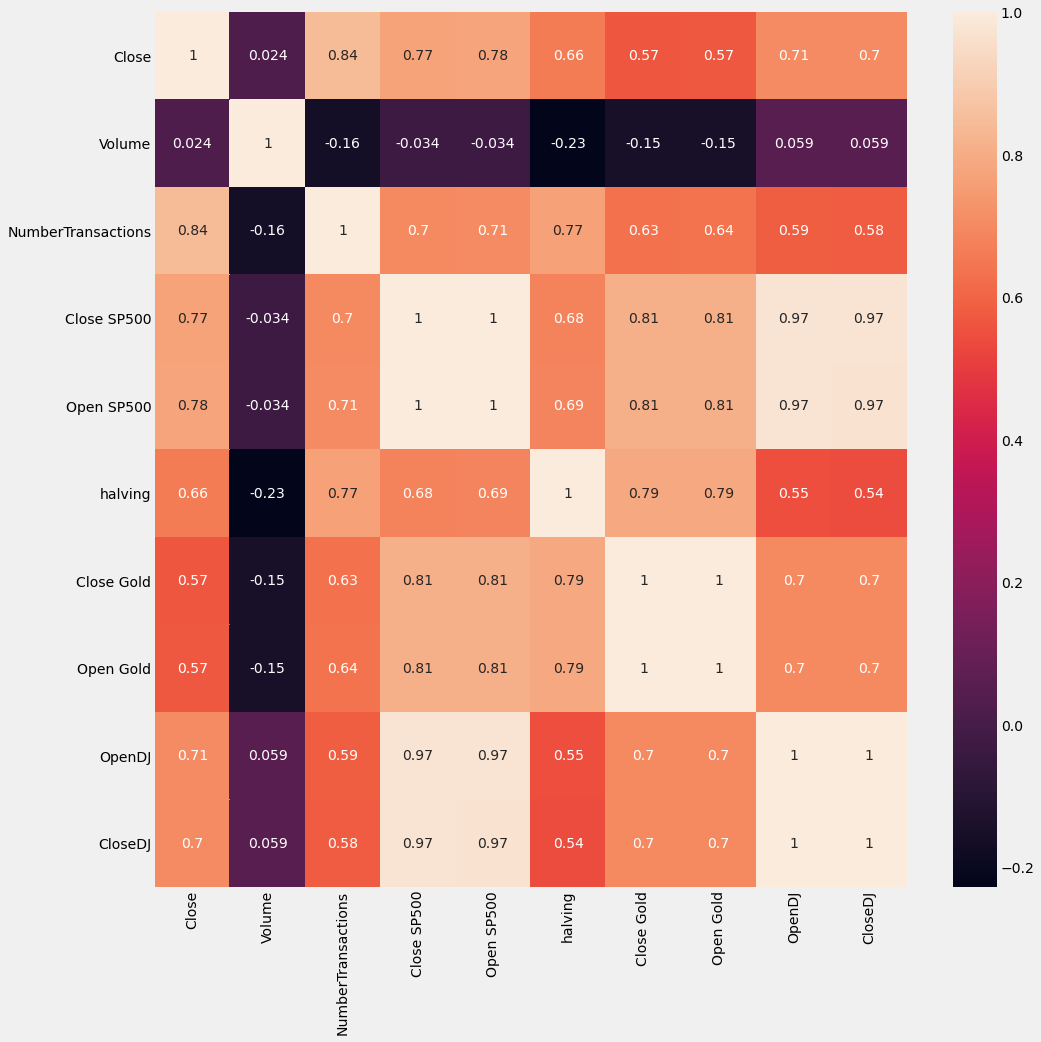

In [330]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [331]:
primeras10 = primeras10.drop(['Volume','Open Gold'], axis=1)

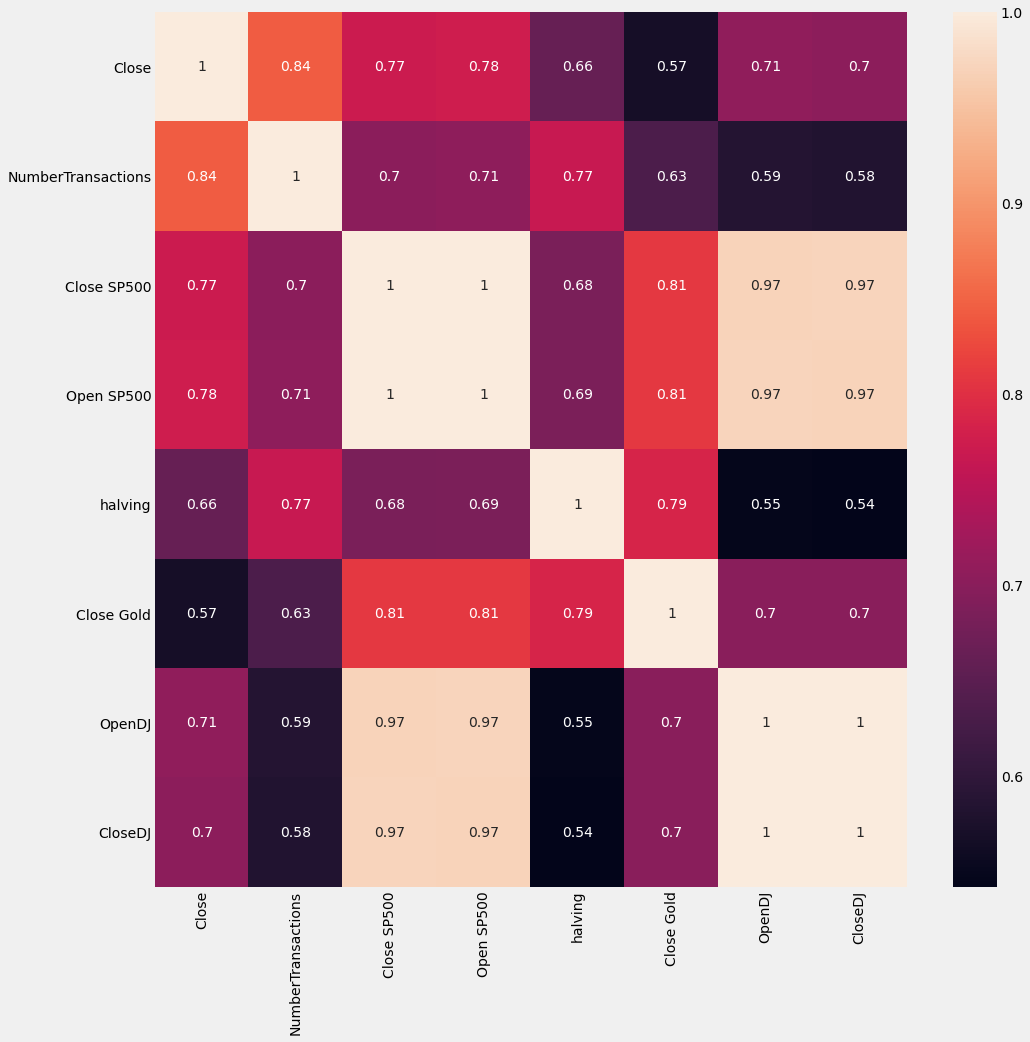

In [332]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 10:20

In [333]:
primeras20 = df2.iloc[:, 10:20] 

In [334]:
primeras20['Close'] = df2.iloc[:,0]

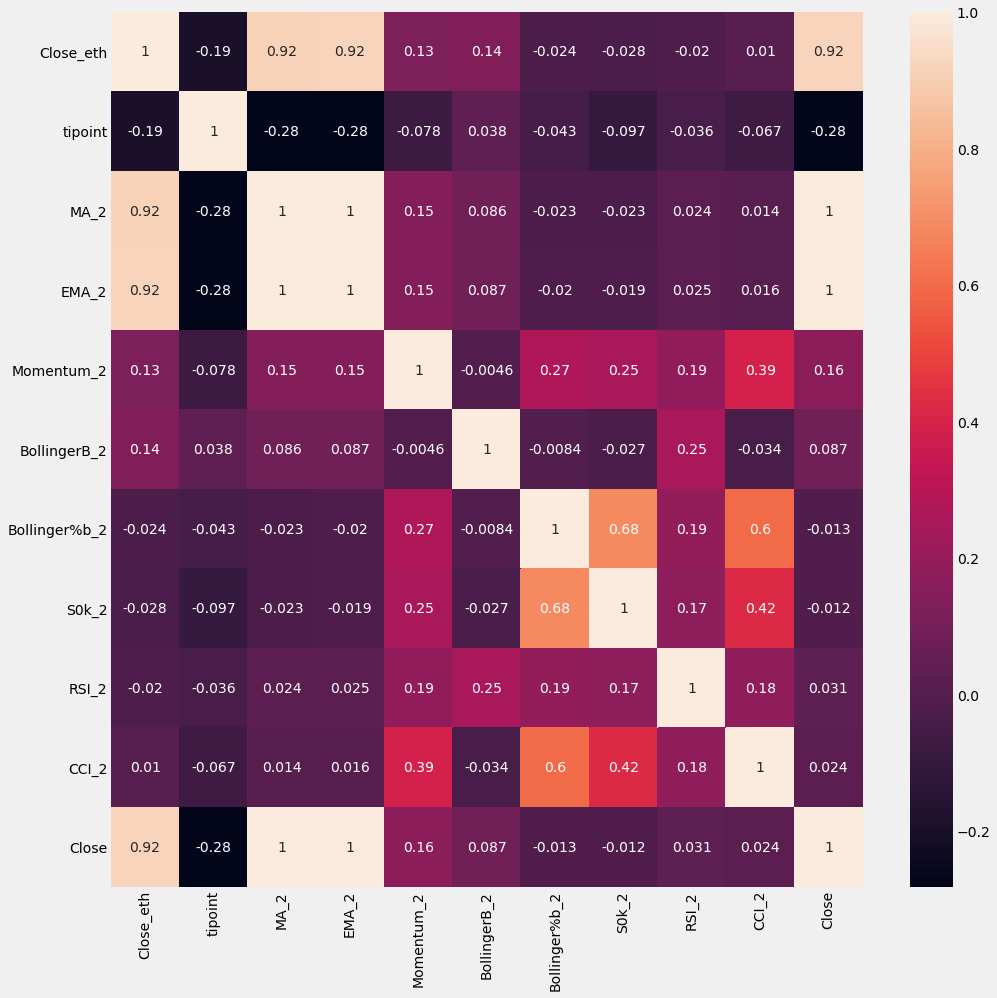

In [335]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [336]:
primeras20 = primeras20.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

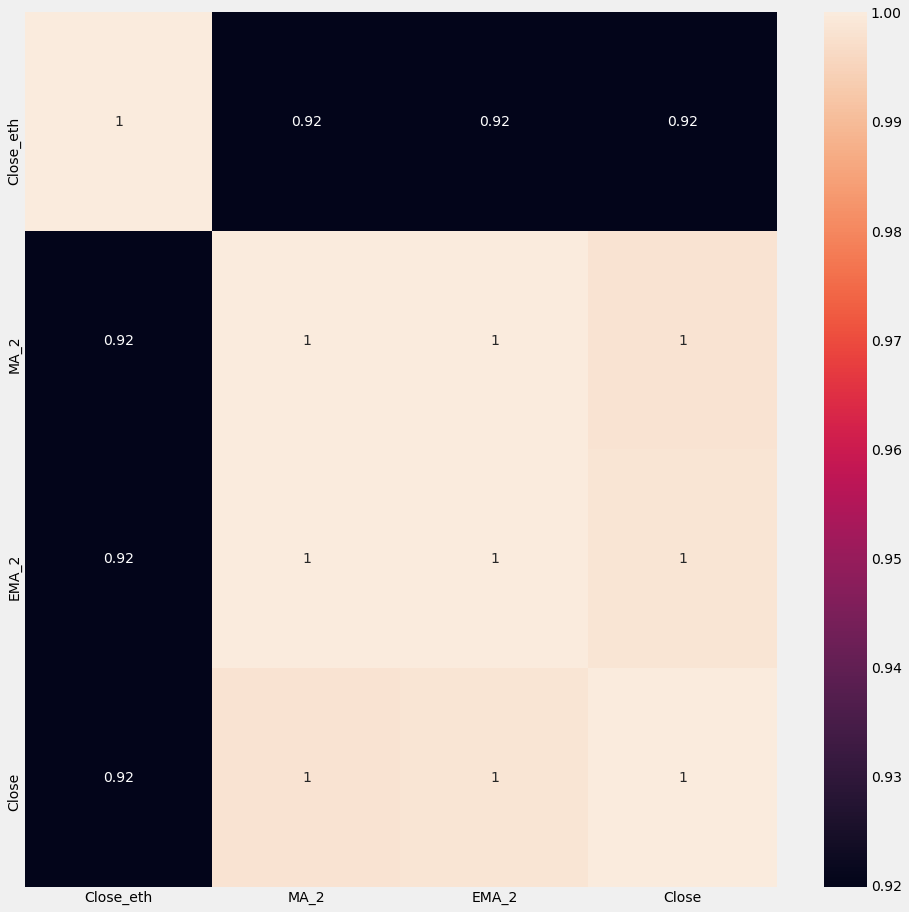

In [337]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 20:30

In [338]:
primeras30 = df2.iloc[:, 20:30]

In [339]:
primeras30['Close'] = df2.iloc[:,0]

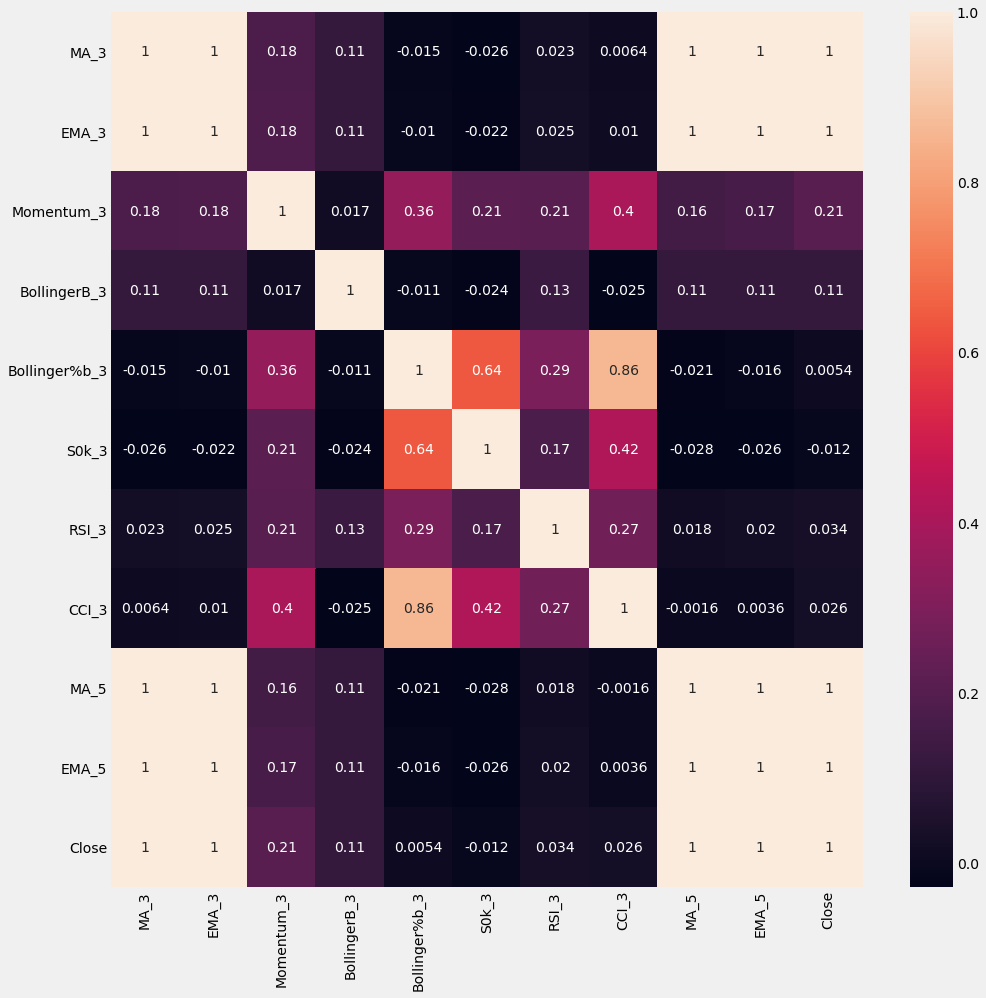

In [340]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [341]:
list(primeras30)

['MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Close']

In [342]:
primeras30 = primeras30.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

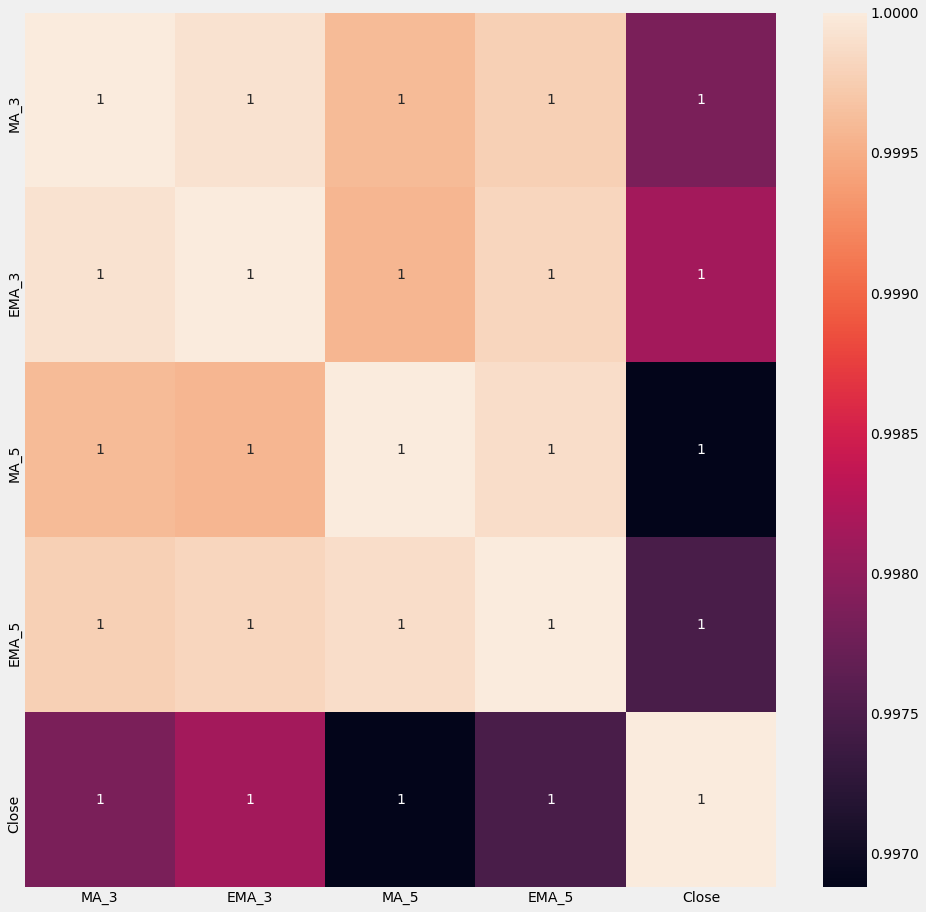

In [343]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 30:40

In [344]:
primeras40 = df2.iloc[:, 30:40]

In [345]:
primeras40['Close'] = df2.iloc[:,0]

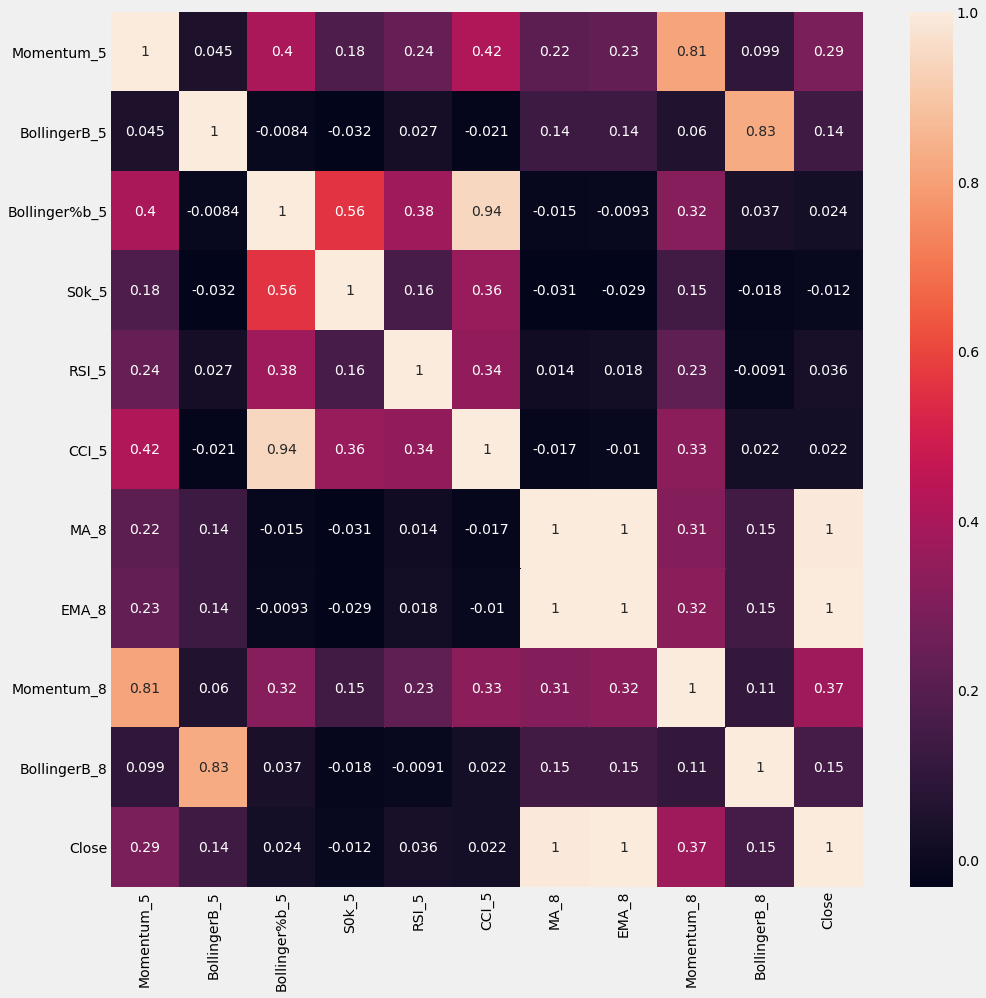

In [346]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [347]:
primeras40 = primeras40.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

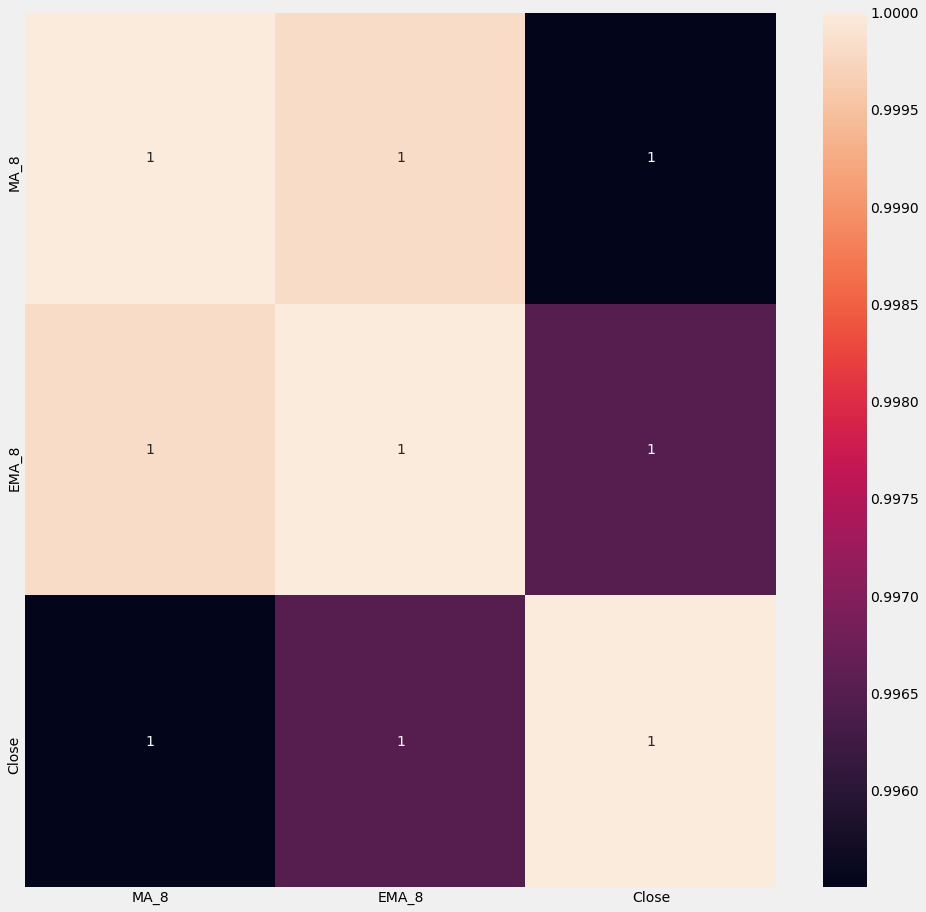

In [348]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 50:60

In [349]:
primeras50 = df2.iloc[:, 50:60]

In [350]:
primeras50['Close'] = df2.iloc[:,0]

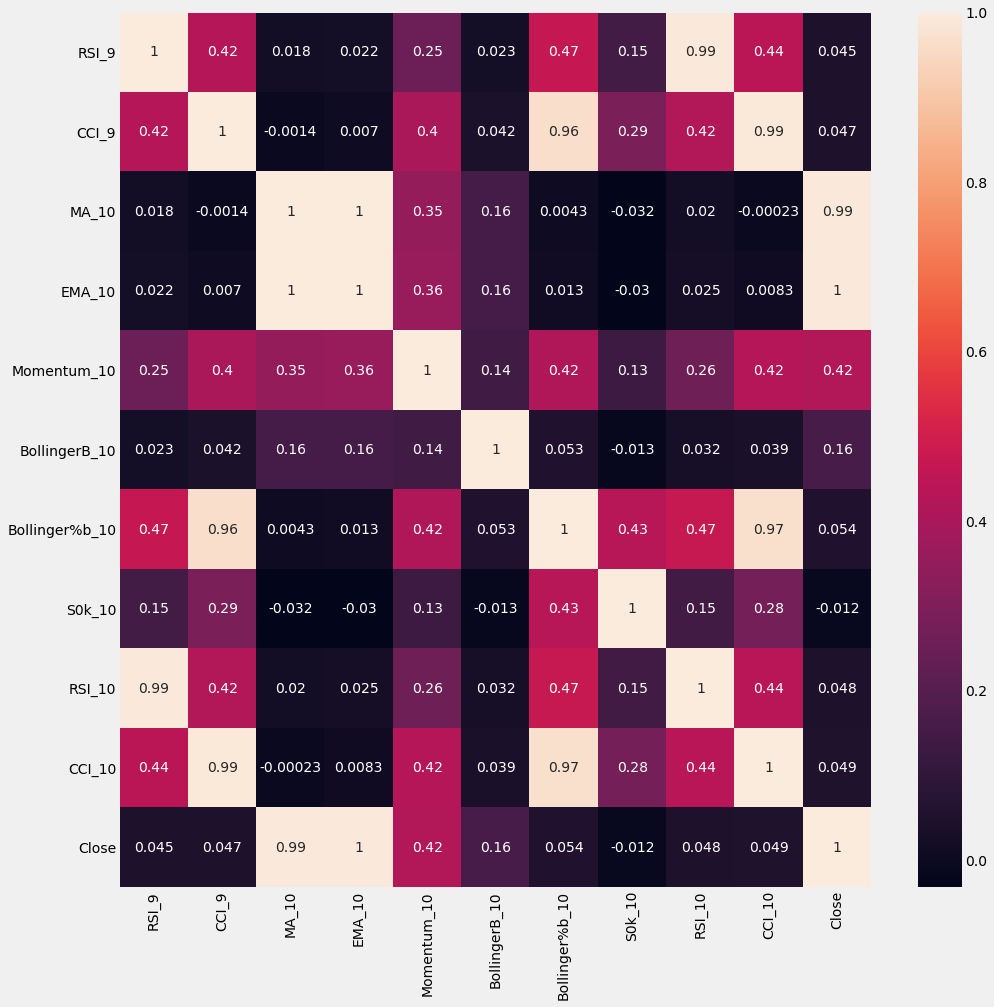

In [351]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [352]:
primeras50 = primeras50.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

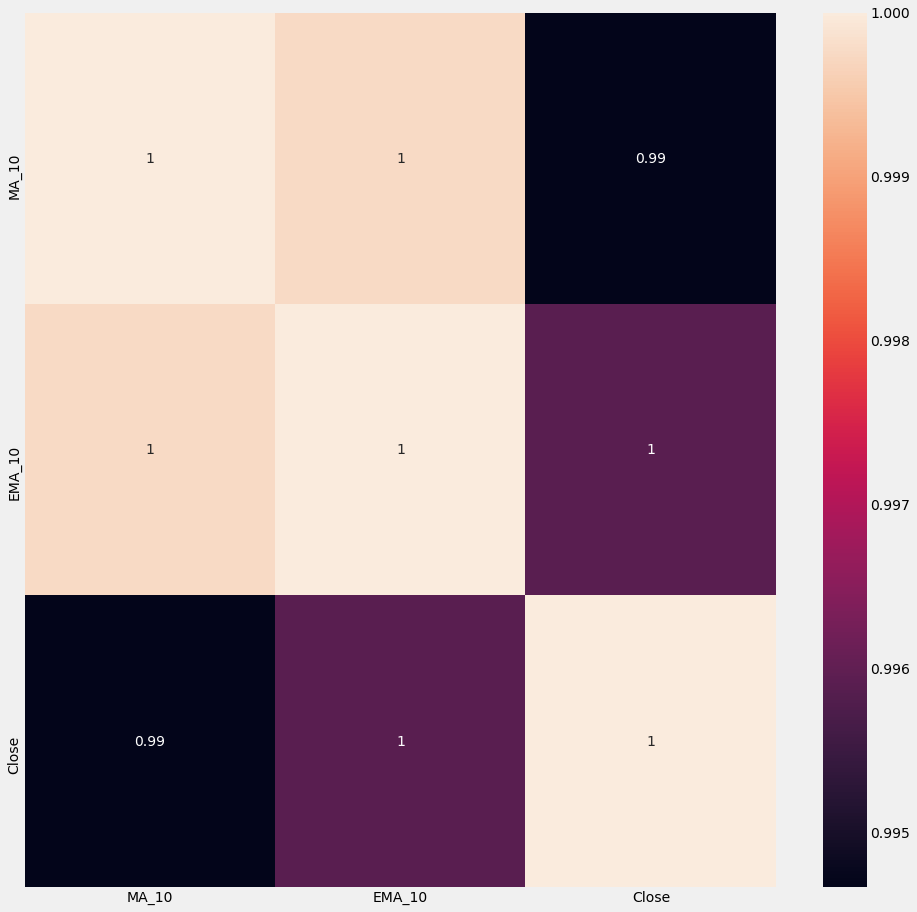

In [353]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 40:50

In [354]:
primeras60 = df2.iloc[:, 40:50]

In [355]:
primeras60['Close'] = df2.iloc[:,0]

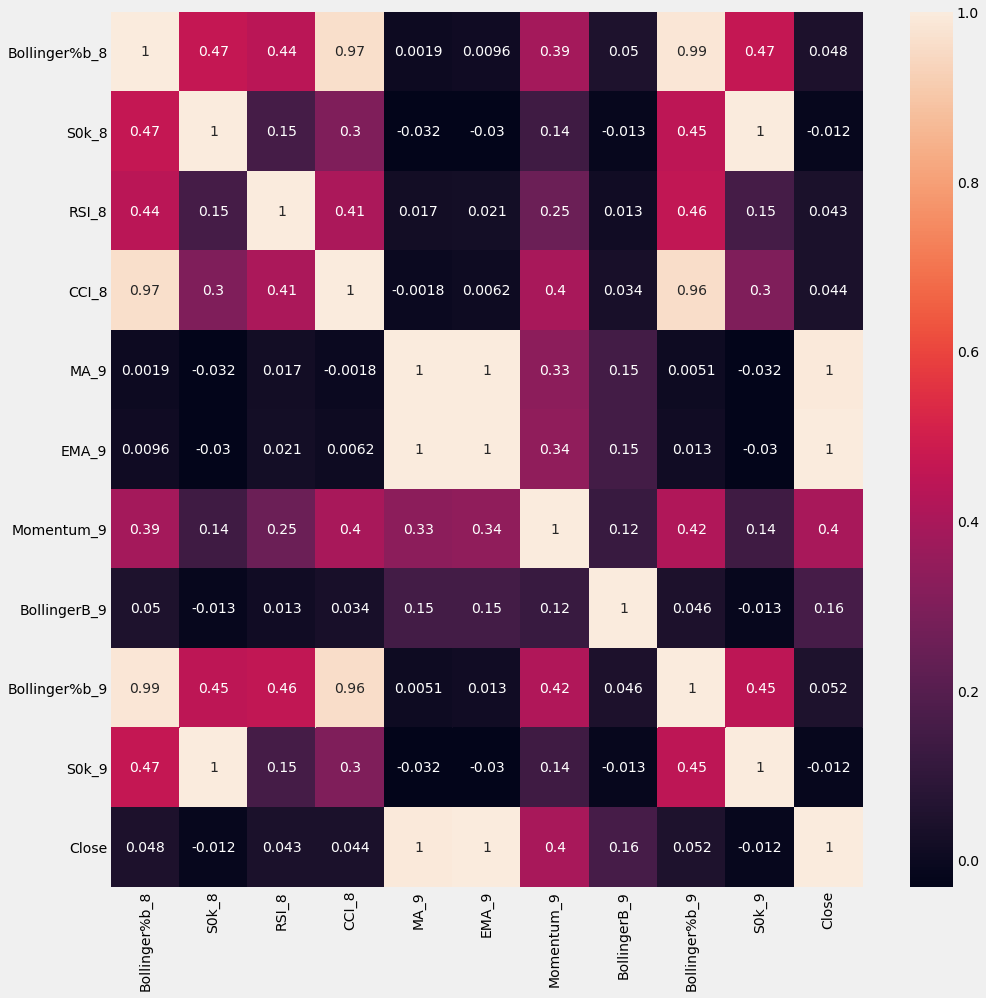

In [356]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [357]:
primeras60 = primeras60.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

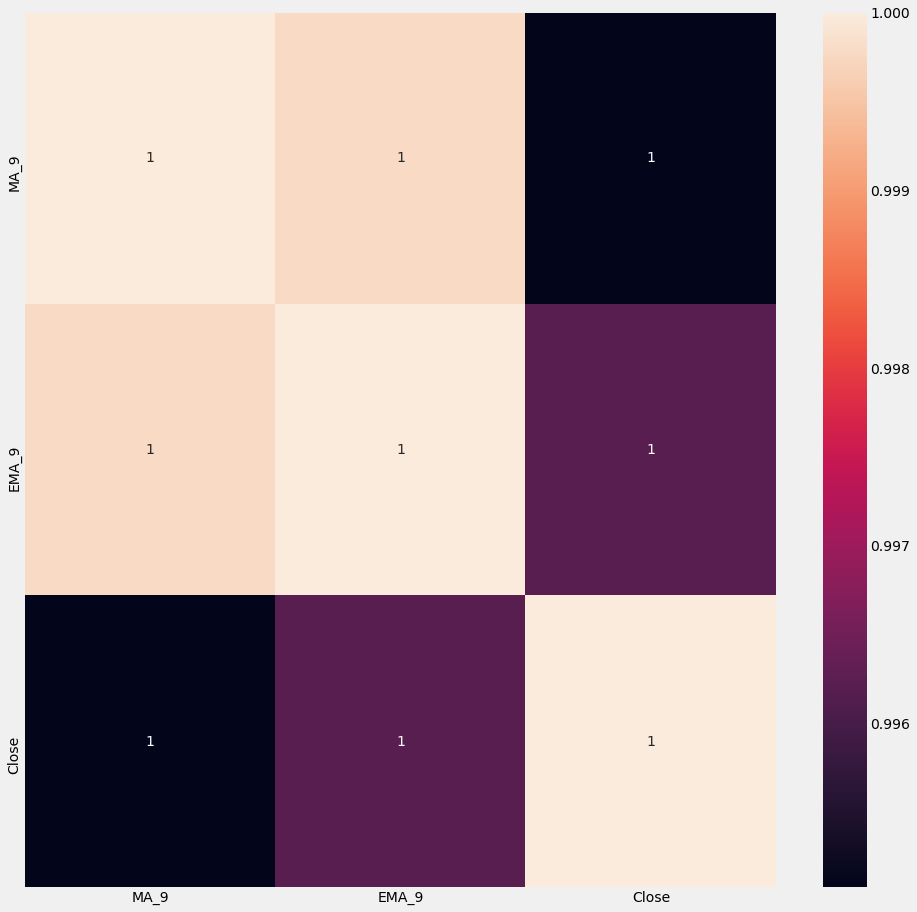

In [358]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 60:70

In [359]:
primeras70 = df2.iloc[:, 60:70]

In [360]:
primeras70['Close'] = df2.iloc[:,0]

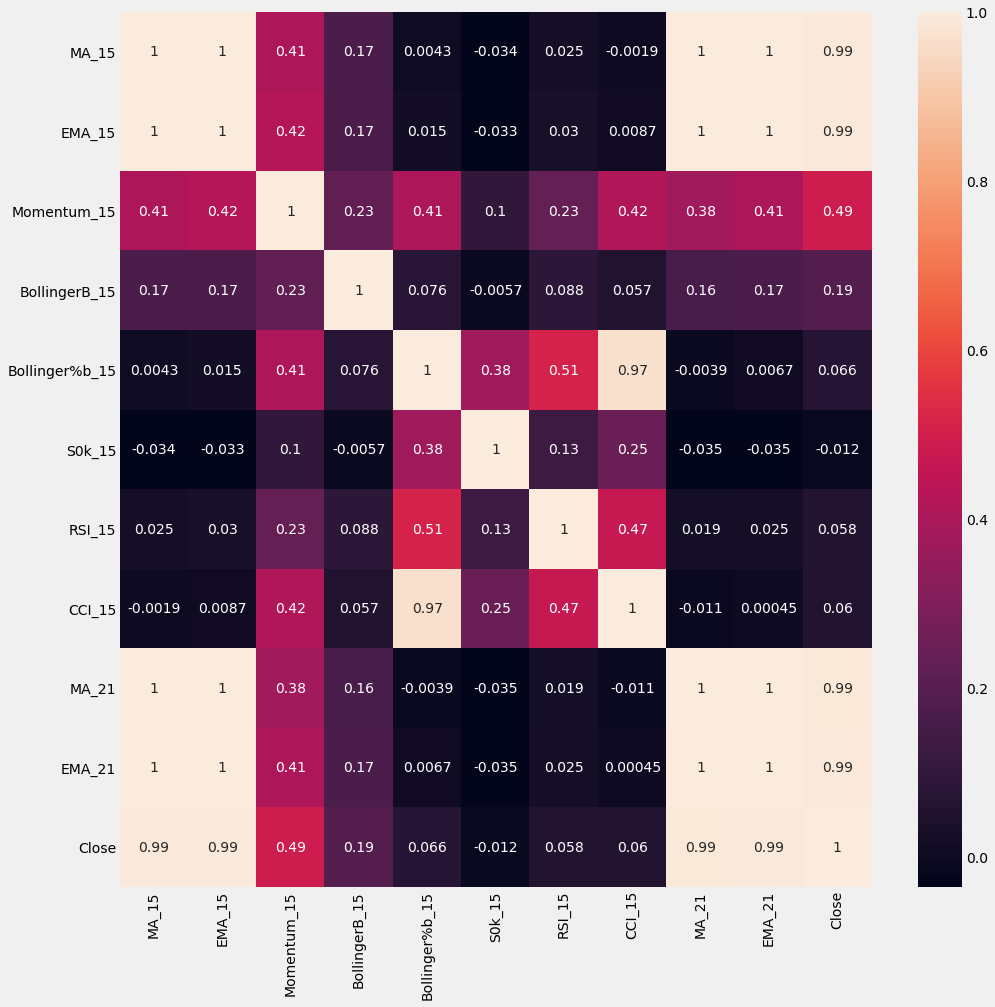

In [361]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [362]:
primeras70 = primeras70.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

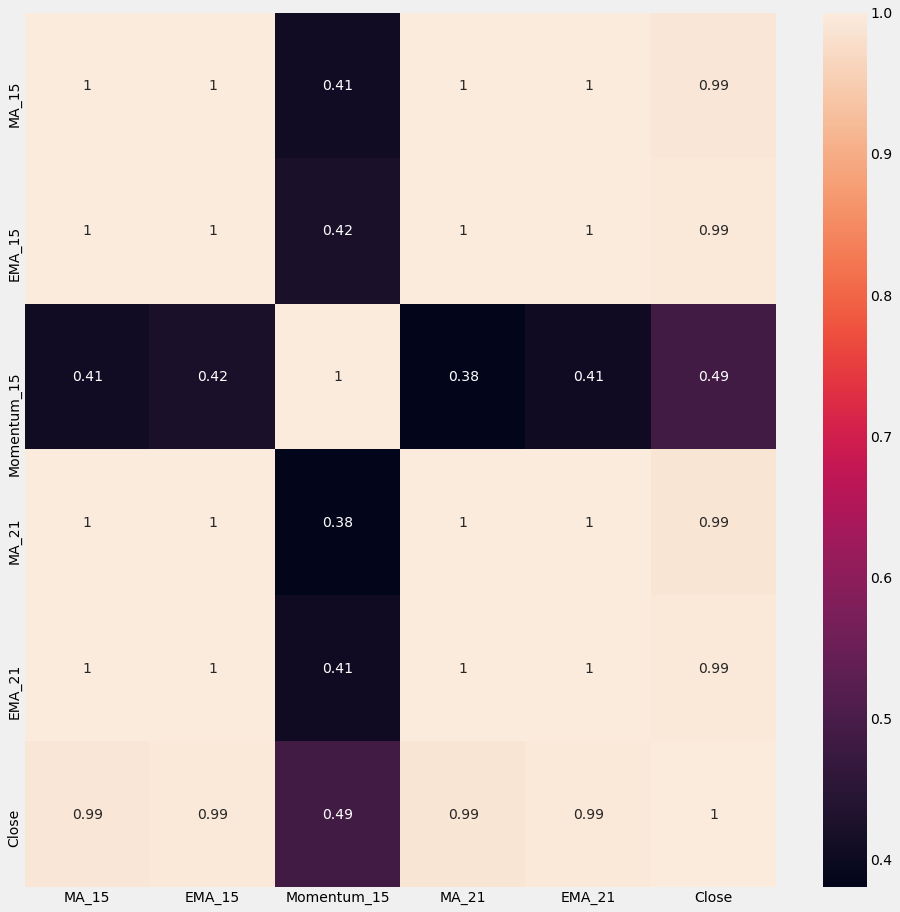

In [363]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 70:80

In [364]:
primeras80 = df2.iloc[:, 70:80]

In [365]:
primeras80['Close'] = df2.iloc[:,0]

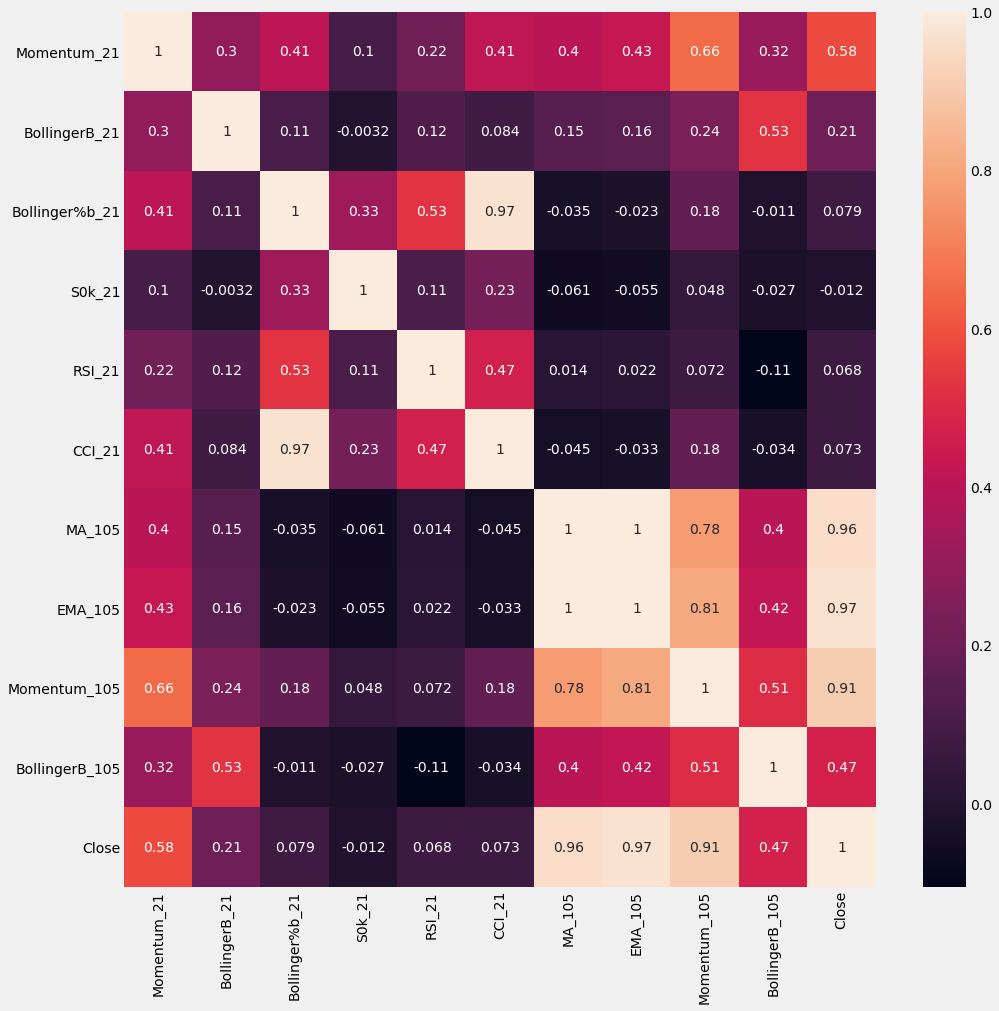

In [366]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [367]:
primeras80 = primeras80.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

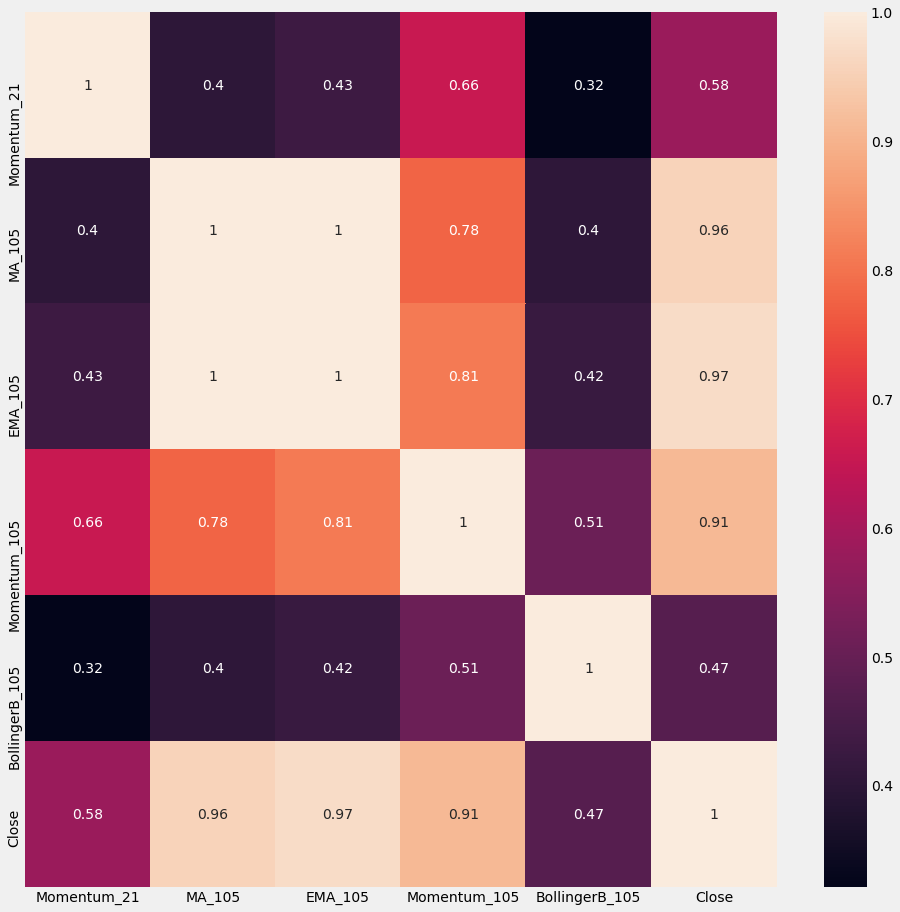

In [368]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 80:90

In [369]:
primeras90 = df2.iloc[:, 80:90]

In [370]:
primeras90['Close'] = df2.iloc[:,0]

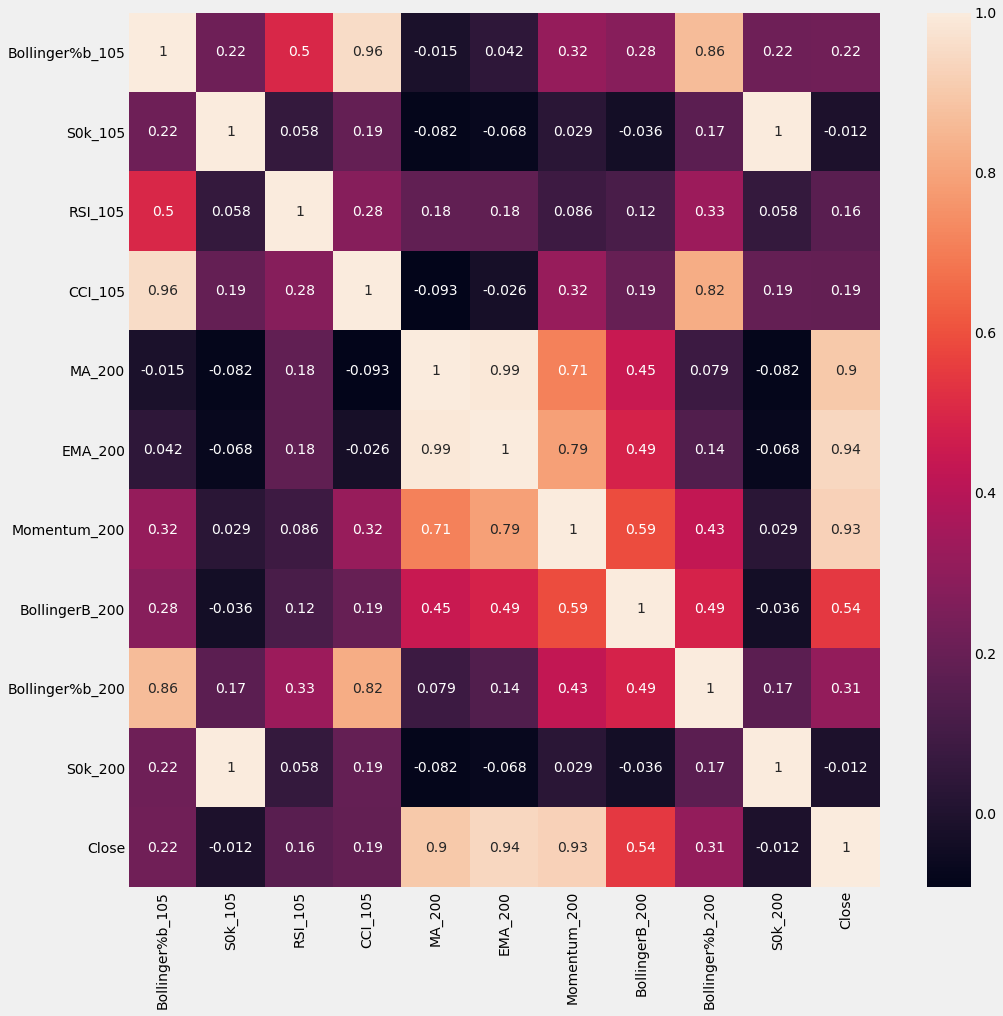

In [371]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [372]:
primeras90 = primeras90.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

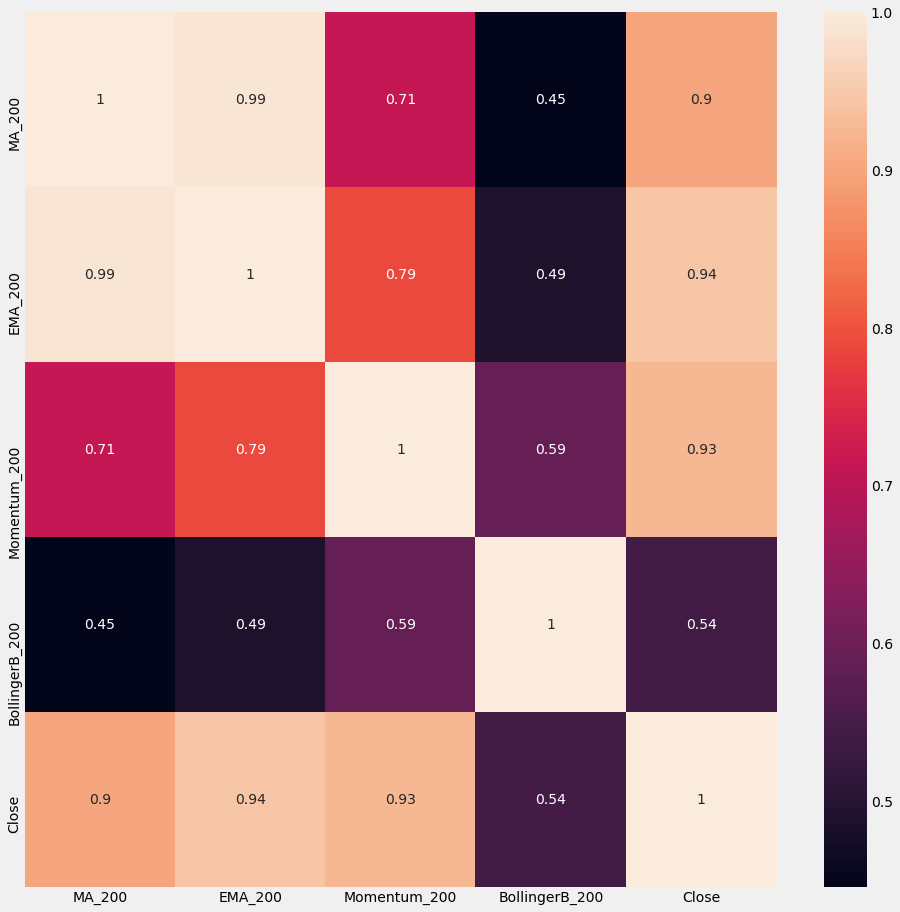

In [373]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 90:100

In [374]:
primeras100 = df2.iloc[:, 90:100]

In [375]:
primeras100['Close'] = df2.iloc[:,0]

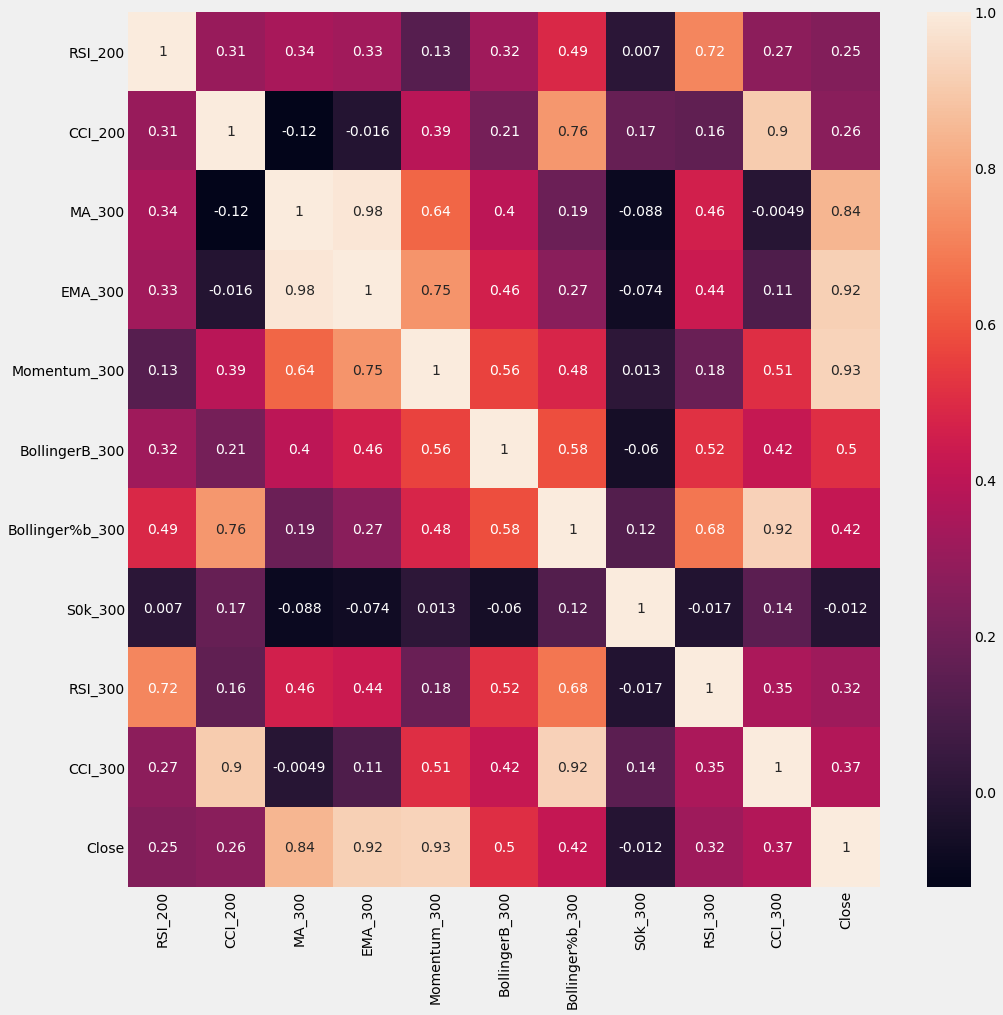

In [376]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [377]:
primeras100 = primeras100.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

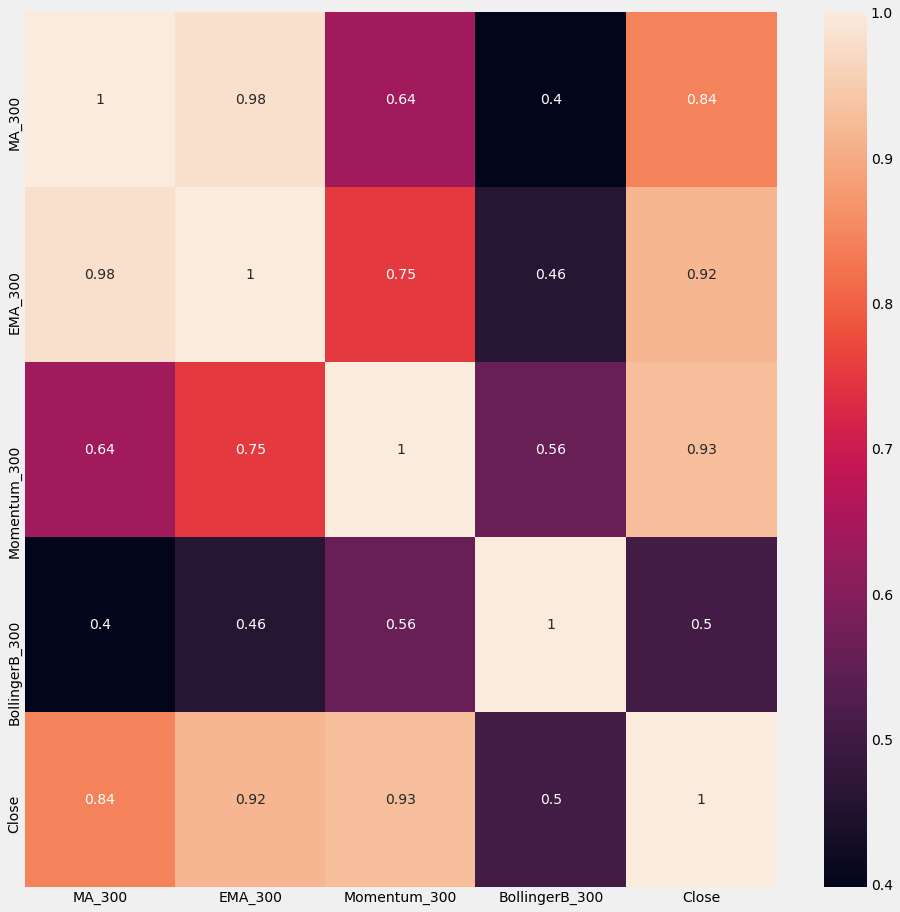

In [378]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 100:110

In [379]:
primeras110 = df2.iloc[:, 100:110]

In [380]:
primeras110['Close'] = df2.iloc[:,0]

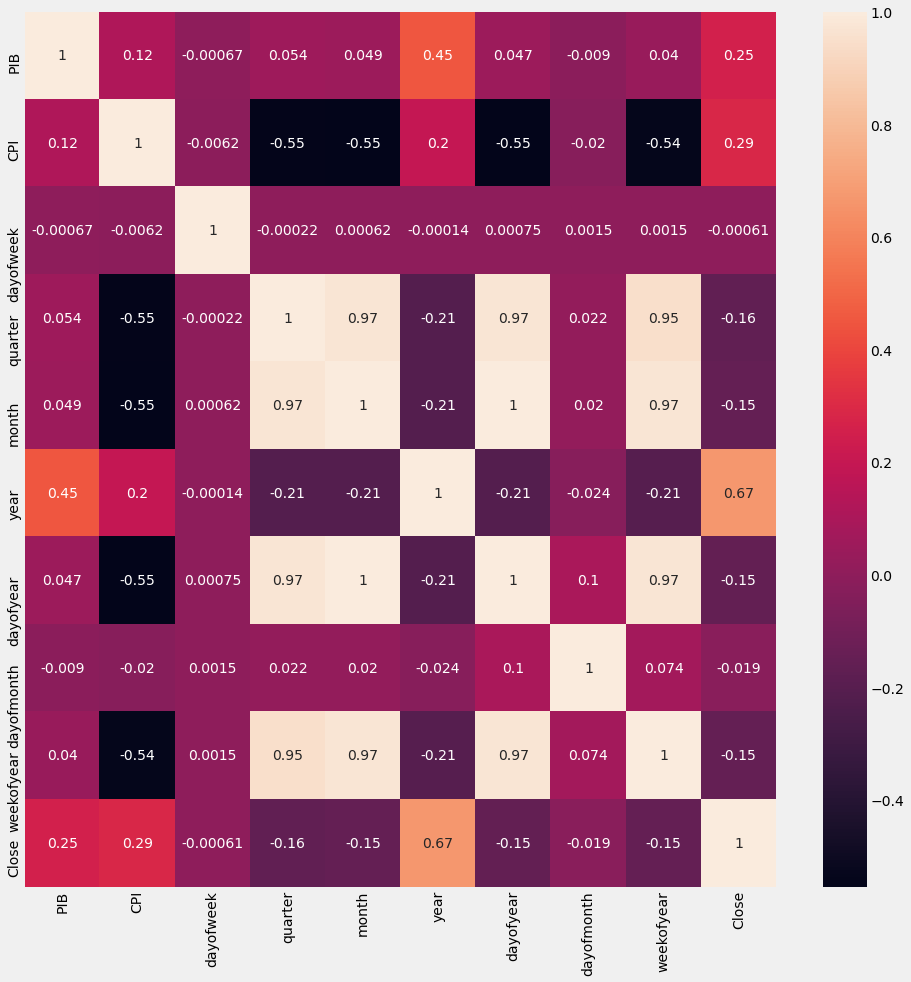

In [381]:
corrMatrix = primeras110.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [382]:
df2 = df2.drop(['Open SP500','Open Gold','Open SP500'], axis=1)

In [383]:
df2 = df2.drop(['Volume','Open Gold','Open SP500','Open Gold','Open SP500'], axis=1)

KeyError: ignored

In [ ]:
df2 = df2.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

In [ ]:
df3 = df2.iloc[:, 1:48]

In [ ]:
df3

In [ ]:
df3.shape

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df3,dimensions = df3.columns[:8], color = 'weekofyear')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)

#fig.write_html("correlations.png")
fig.show()
# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


In [ ]:
df2.shape

In [ ]:
list(df2)

In [384]:
dfg= pd.DataFrame()
dfg['EMA_5'] = df2['EMA_5']
dfg['Momentum_300'] = df2['Momentum_300']
dfg['dayofweek'] = df2['dayofweek']
dfg['quarter'] = df2['quarter']
dfg['month'] = df2['month']
dfg['year'] = df2['year']
dfg['dayofyear'] = df2['dayofyear']
dfg['weekofyear'] = df2['weekofyear']

In [385]:
dfg = dfg.drop(['year','dayofyear','weekofyear'], axis=1)

In [386]:
dfg = dfg.drop(['quarter','month'], axis=1)

In [387]:
dfg

EMA_5  Momentum_300  dayofweek
0         0.000000          0.00          6
1         0.000000          0.00          0
2         0.000000          0.00          1
3         0.000000          0.00          2
4         0.000000          0.00          3
...            ...           ...        ...
2014  62026.351050      53849.75          4
2015  61795.834033      51975.85          5
2016  61199.442689      50711.97          6
2017  59516.298459      46464.32          0
2018  58221.912306      46008.25          1

[2019 rows x 3 columns]

# XGBoost

In [388]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfg)

In [389]:
scaled = pd.DataFrame(scaled)
scaled = scaled.rename(columns={0:'EMA_5',
                                   1:'Momentum_300',
                                  2:'dayofweek'})
scaled

EMA_5  Momentum_300  dayofweek
0     0.000000      0.197274   1.000000
1     0.000000      0.197274   0.000000
2     0.000000      0.197274   0.166667
3     0.000000      0.197274   0.333333
4     0.000000      0.197274   0.500000
...        ...           ...        ...
2014  1.000000      0.996141   0.666667
2015  0.996284      0.968342   0.833333
2016  0.986668      0.949592   1.000000
2017  0.959532      0.886578   0.000000
2018  0.938664      0.879812   0.166667

[2019 rows x 3 columns]

In [390]:
X_train = scaled[:1959]
y_train = df2.Close[:1959]
X_test = scaled[1959:]
y_test = df2.Close[1959:]

In [391]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [392]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[16:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

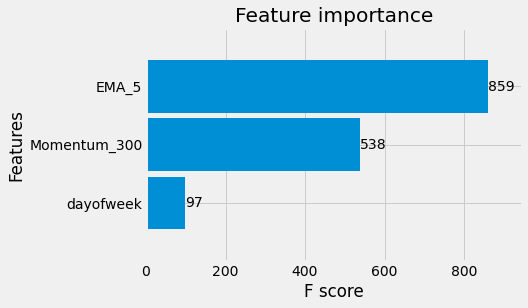

In [393]:
plot_importance(reg, height=0.9)

In [394]:
validacion = reg.predict(X_test)

In [395]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [396]:
validacion_p

validacion
0   54861.441406
1   54861.441406
2   54991.609375
3   55393.792969
4   55625.558594
5   55470.976562
6   55761.039062
7   51783.121094
8   51612.824219
9   48192.503906
10  52029.054688
11  52204.039062
12  51747.871094
13  52073.652344
14  51783.121094
15  51610.128906
16  51542.804688
17  55625.558594
18  55393.792969
19  55239.210938
20  55347.617188
21  54861.441406
22  54861.441406
23  54991.609375
24  55393.792969
25  55393.792969
26  55239.210938
27  55347.617188
28  54861.441406
29  54861.441406
30  54991.609375
31  55393.792969
32  55393.792969
33  55470.976562
34  55579.382812
35  54861.441406
36  54861.441406
37  54991.609375
38  55393.792969
39  55393.792969
40  55239.210938
41  55347.617188
42  54861.441406
43  54861.441406
44  54991.609375
45  55393.792969
46  55393.792969
47  55239.210938
48  55347.617188
49  54861.441406
50  54861.441406
51  54991.609375
52  55393.792969
53  55393.792969
54  55239.210938
55  55347.617188
56  54861.441406
57  54861.441406
58  54991.609375
59  55393.792969

In [397]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

15858821.39474262

In [398]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

3278.1152812500004

In [399]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [400]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [401]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [402]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[16:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34999.3
[2]	Test-rmse:27336.6
[3]	Test-rmse:22603.9
[4]	Test-rmse:18418.1
[5]	Test-rmse:15420
[6]	Test-rmse:13127.4
[7]	Test-rmse:11296.1
[8]	Test-rmse:9672.72
[9]	Test-rmse:8462.82
[10]	Test-rmse:7623.39
[11]	Test-rmse:6950.52
[12]	Test-rmse:6299.7
[13]	Test-rmse:5771.69
[14]	Test-rmse:5345.62
[15]	Test-rmse:5003.87
[16]	Test-rmse:5000.04
[17]	Test-rmse:4768.13
[18]	Test-rmse:4587.5
[19]	Test-rmse:4438.34
[20]	Test-rmse:4324.21
[21]	Test-rmse:4233.05
[22]	Test-rmse:4159.09
[23]	Test-rmse:4175.09
[24]	Test-rmse:4122.88
[25]	Test-rmse:4082.34
[26]	Test-rmse:4050.09
[27]	Test-rmse:4021.3
[28]	Test-rmse:4030
[29]	Test-rmse:4028.71
[30]	Test-rmse:4011.42
[31]	Test-rmse:4012.63
[32]	Test-rmse:4012.66
[33]	Test-rmse:4004.97
[34]	Test-rmse:4004.7
[35]	Test-rmse:4004.99
[36]	Te

In [403]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 3980.10 with 54 rounds


In [404]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[16:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4714.187012      87.011738    4716.001790    166.431112
1      3323.325928      60.328871    3330.467773    128.382160
2      2344.070882      42.943463    2354.824381     98.628195
3      1655.147624      30.369449    1661.647787     76.235598
4      1170.811727      21.665370    1181.525553     61.336879
5       834.670552      14.429363     851.097249     48.197852
6       604.072774       9.792333     634.567301     40.125617
7       449.929993       5.832335     498.523702     32.450868
8       352.548675       3.624354     417.759633     27.502980
9       290.086192       2.959802     368.783315     23.740203
10      250.530680       2.567978     341.874552     23.694654
11      225.559168       3.581632     325.073608     20.098450
12      208.544540       3.818095     316.857045     18.958132
13      197.588237       4.475259     312.548116     18.496581
14      189.163167       5.522001     311.648611     18.407868
15      183.306036       5.577606     310.734894     17.770461
16      178.738118       6.369502     309.711192     16.217852
17      175.740596       6.431541     309.385935     16.257217
18      172.280334       8.017765     308.899221     16.128495
19      169.297460       8.274918     308.350342     16.518446
20      167.271734       8.895799     308.253337     16.091541
21      165.371175       9.500532     308.009013     15.617009

In [405]:
cv_results['test-mae-mean'].min()

308.0090126666667

In [406]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [407]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [408]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [409]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [410]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 290.6236206 for 17 rounds


In [411]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 290.6236206


In [412]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [413]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [414]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 290.6236206 for 17 rounds
CV with subsample=1.0, colsample=0.9
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47

In [415]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [416]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 289.8674684 for 17 rounds

CV with eta=0.2
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:37] WARNING: /workspace/src/objective/re

In [417]:
params['eta'] = 0.01

In [418]:
params['eval_metric'] = 'mae'

In [419]:
params

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [420]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[16:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55152.4
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54779.3
[2]	Test-mae:54415.3
[3]	Test-mae:54047.4
[4]	Test-mae:53688.5
[5]	Test-mae:53334.4
[6]	Test-mae:52979.9
[7]	Test-mae:52636.9
[8]	Test-mae:52289.4
[9]	Test-mae:51896.1
[10]	Test-mae:51521.8
[11]	Test-mae:51183.7
[12]	Test-mae:50812.2
[13]	Test-mae:50443.9
[14]	Test-mae:50113.5
[15]	Test-mae:49792.7
[16]	Test-mae:49434
[17]	Test-mae:49063.4
[18]	Test-mae:48705.6
[19]	Test-mae:48365
[20]	Test-mae:48018.1
[21]	Test-mae:47685.9
[22]	Test-mae:47308.7
[23]	Test-mae:46966.3
[24]	Test-mae:46670.7
[25]	Test-mae:46373.9
[26]	Test-mae:46063.4
[27]	Test-mae:45772
[28]	Test-mae:45446.2
[29]	Test-mae:45118
[30]	Test-mae:44795.5
[31]	Test-mae:44469.3
[32]	Test-mae:44193
[33]	Test-mae:43896.9
[34]	Test-mae:43625.5
[35]	Test-mae:43321.8
[36]	Test-mae:42996.6
[37]	Test-mae:42661.4


In [421]:
dtrain2 = xgb.DMatrix(X_test)

In [422]:
validacion = best_model_Users.predict(dtrain2)

In [423]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [424]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

49863296.46023162

In [425]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6234.753796875

In [426]:
y_pru = y_test

In [427]:
y_pru = y_pru.reset_index()

In [428]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

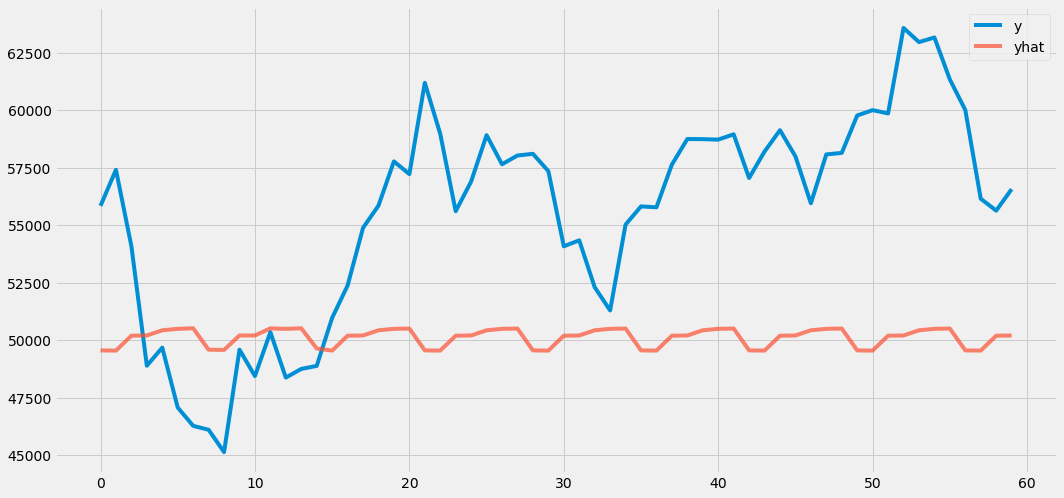

In [429]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [430]:
dtrain2 = xgb.DMatrix(scaled)

In [431]:
validacion = best_model_Users.predict(dtrain2)

In [432]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       264.683929
1       262.715973
2       262.532379
3       262.538116
4       264.371094
...            ...
2014  50506.828125
2015  49557.140625
2016  49548.632812
2017  50195.226562
2018  50205.710938

[2019 rows x 1 columns]

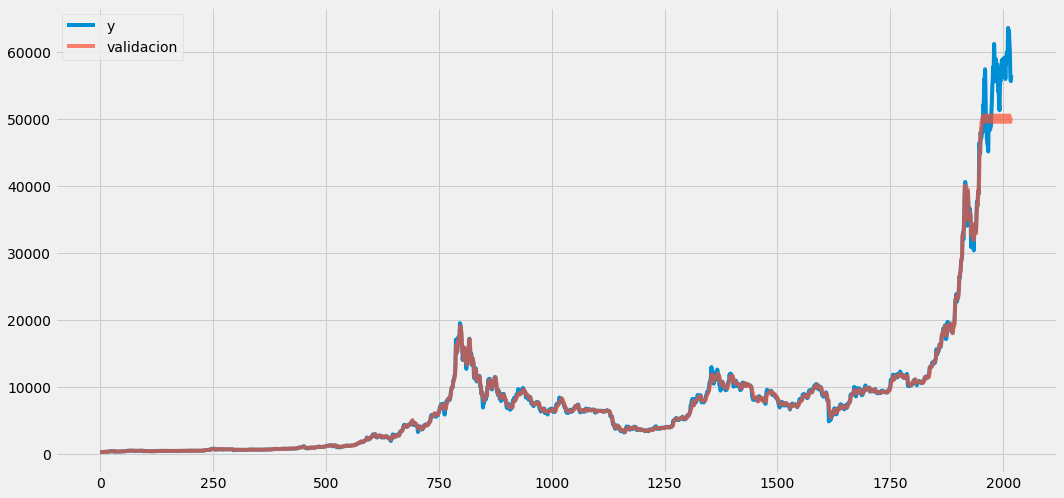

In [433]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [434]:
!pip install shap

In [435]:
!pip install eli5

In [436]:
!pip install lime

In [437]:
from collections import Counter
import shap
import eli5
import lime
from lime.lime_tabular import LimeTabularExplainer
shap.initjs()

In [438]:
!pip install s3fs

In [439]:
import time
from scipy import stats
import datetime
import s3fs
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

import pandas as pd, numpy as np, os, random, math, matplotlib, pylab, scipy, gc

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [440]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6695.842


0            1           2
0  37498.402344  5656.795410 -291.420502
1  37522.089844  5648.786133 -315.665771
2  37675.789062  5754.878418   70.963005
3  37671.113281  5766.779785   74.196236
4  37747.195312  5811.588867  178.835739

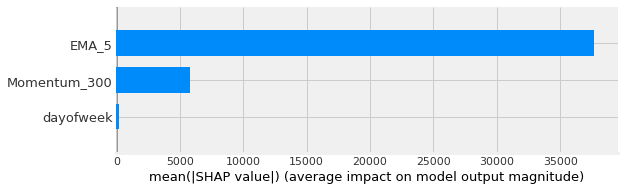

In [441]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=30)

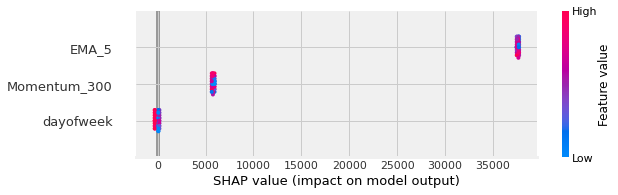

In [442]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=30)

#Hasta aqui

In [443]:
2019*0.7


1413.3

In [444]:
2019*0.15

302.84999999999997

In [445]:
1413+303

1716

In [446]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 107 columns]

df2.shape()

# XGBoost

In [447]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 107 columns]

In [501]:
X = df2.iloc[:, 1:48]
y = df2.iloc[:, [0]]

In [449]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [450]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [451]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [452]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[16:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

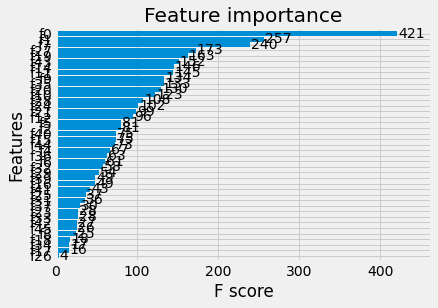

In [453]:
plot_importance(reg, height=0.9)

In [454]:
validacion = reg.predict(X_test)

In [455]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [456]:
validacion_p

validacion
0   52216.566406
1   51272.875000
2   48888.773438
3   40192.195312
4   40457.109375
5   40547.574219
6   39562.406250
7   38938.210938
8   39669.089844
9   37909.179688
10  38561.796875
11  40643.292969
12  39634.527344
13  40315.667969
14  40886.226562
15  40982.863281
16  48468.121094
17  50760.039062
18  48220.398438
19  48278.843750
20  47157.378906
21  50847.957031
22  50119.410156
23  48481.492188
24  47195.199219
25  47958.687500
26  48819.906250
27  48796.808594
28  48533.929688
29  49263.996094
30  39633.925781
31  40550.171875
32  40468.625000
33  40726.644531
34  40399.199219
35  41059.476562
36  41122.136719
37  48287.500000
38  48449.488281
39  51131.289062
40  48930.343750
41  51886.214844
42  50953.335938
43  50773.187500
44  51369.753906
45  51309.019531
46  51384.378906
47  48715.347656
48  50184.097656
49  51432.257812
50  51022.453125
51  51210.156250
52  52636.316406
53  53910.734375
54  53078.703125
55  53263.843750
56  52827.914062
57  52011.761719
58  51960.437500
59  53396.539062

In [457]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

80799292.22994949

In [458]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

8566.7137109375

In [459]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [460]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [461]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [462]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[16:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35111.8
[2]	Test-rmse:28366.4
[3]	Test-rmse:23453.2
[4]	Test-rmse:19838.8
[5]	Test-rmse:17266.2
[6]	Test-rmse:15327.2
[7]	Test-rmse:13513.3
[8]	Test-rmse:12505.1
[9]	Test-rmse:11706.9
[10]	Test-rmse:11162.3
[11]	Test-rmse:10817
[12]	Test-rmse:10492
[13]	Test-rmse:10227.3
[14]	Test-rmse:10049.5
[15]	Test-rmse:9931.27
[16]	Test-rmse:9796.05
[17]	Test-rmse:9700.8
[18]	Test-rmse:9629.99
[19]	Test-rmse:9557.68
[20]	Test-rmse:9505.37
[21]	Test-rmse:9454.84
[22]	Test-rmse:9429.42
[23]	Test-rmse:9401.6
[24]	Test-rmse:9378.92
[25]	Test-rmse:9363.55
[26]	Test-rmse:9347.51
[27]	Test-rmse:9329.26
[28]	Test-rmse:9310.46
[29]	Test-rmse:9300.98
[30]	Test-rmse:9294.93
[31]	Test-rmse:9287.75
[32]	Test-rmse:9292.15
[33]	Test-rmse:9289.67
[34]	Test-rmse:9287.8
[35]	Test-rmse:9279.63
[36]	

In [463]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 9269.32 with 48 rounds


In [464]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4715.877279      86.379058    4723.301921    158.943410
1      3325.269857      60.977819    3337.661540    121.282909
2      2347.524740      43.755585    2351.398682     90.837132
3      1656.574056      31.910457    1662.550741     71.204263
4      1170.155395      22.163011    1176.051025     58.508043
5       828.537048      15.404348     843.952617     50.447876
6       588.011719      10.509726     619.887268     44.849628
7       420.948934       6.149934     471.199249     39.339881
8       307.453359       4.077092     379.760864     39.076334
9       231.629028       3.041758     325.811635     35.564689
10      183.346700       2.727550     296.125732     32.559406
11      152.280797       1.868610     278.884531     29.531679
12      132.201441       2.121856     270.456858     28.302672
13      119.556203       2.488399     266.278498     28.760113
14      110.325686       2.368435     264.366745     28.310138
15      104.024234       2.536656     263.514308     27.693838
16       99.087145       3.120398     262.371552     27.136471
17       94.626544       3.825023     262.654806     26.213373
18       90.884020       4.193235     262.054062     25.927903
19       86.776932       5.164324     262.245977     25.755041
20       83.872541       5.929780     261.678594     25.788283

In [465]:
cv_results['test-mae-mean'].min()

261.6785936666667

In [466]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [467]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [468]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [469]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[16:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [470]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 258.690921 for 31 rounds


In [471]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 258.690921


In [472]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [473]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [474]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[16:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 258.690921 for 31 rounds
CV with subsample=1.0, colsample=0.9
[16:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:

In [475]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

In [476]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 250.938263 for 29 rounds

CV with eta=0.2
[16:51:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:51:29] WARNING: /workspace/src/objective/reg

In [477]:
params['eta'] = 0.01

In [478]:
params['eval_metric'] = 'mae'

In [479]:
params

{'colsample_bytree': 0.9,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [480]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[16:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55148.9
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54774.3
[2]	Test-mae:54403.3
[3]	Test-mae:54035.9
[4]	Test-mae:53672.1
[5]	Test-mae:53312
[6]	Test-mae:52955.3
[7]	Test-mae:52585.4
[8]	Test-mae:52235.6
[9]	Test-mae:51872.7
[10]	Test-mae:51529.6
[11]	Test-mae:51173.6
[12]	Test-mae:50800.4
[13]	Test-mae:50451.1
[14]	Test-mae:50083.6
[15]	Test-mae:49720.5
[16]	Test-mae:49373.5
[17]	Test-mae:49037.3
[18]	Test-mae:48682.8
[19]	Test-mae:48352.9
[20]	Test-mae:48005.6
[21]	Test-mae:47674.7
[22]	Test-mae:47333.6
[23]	Test-mae:47016
[24]	Test-mae:46678.1
[25]	Test-mae:46345.2
[26]	Test-mae:46013.6
[27]	Test-mae:45701
[28]	Test-mae:45377.7
[29]	Test-mae:45055.2
[30]	Test-mae:44735.9
[31]	Test-mae:44434.8
[32]	Test-mae:44122.9
[33]	Test-mae:43812.3
[34]	Test-mae:43504.7
[35]	Test-mae:43200.1
[36]	Test-mae:42899.2
[37]	Test-mae:4257

In [481]:
dtrain2 = xgb.DMatrix(X_test)

In [482]:
validacion = best_model_Users.predict(dtrain2)

In [483]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [484]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

81117862.45096639

In [485]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

8659.0461328125

In [486]:
y_pru = y_test

In [487]:
y_pru = y_pru.reset_index()

In [488]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

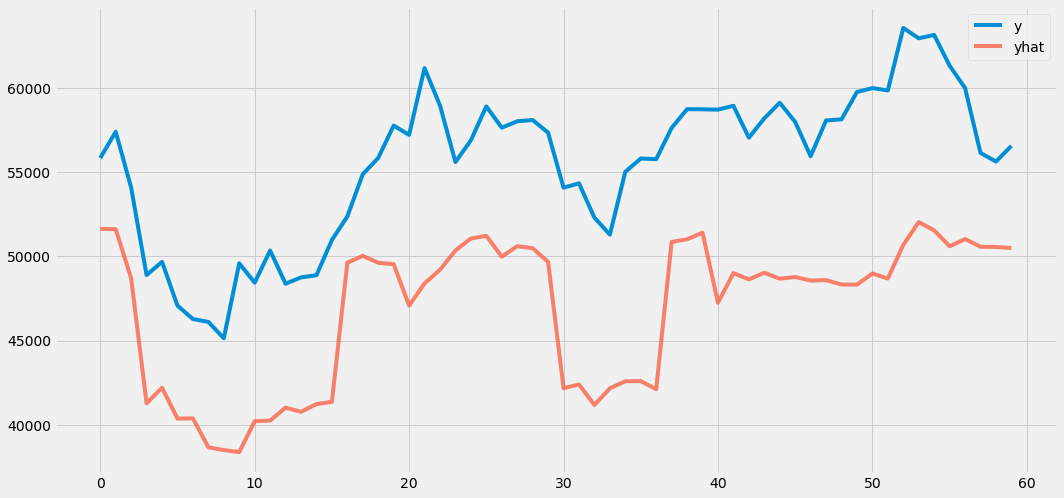

In [489]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [490]:
dtrain2 = xgb.DMatrix(scaled)

In [491]:
validacion = best_model_Users.predict(dtrain2)

In [492]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       253.889603
1       255.307831
2       255.962631
3       258.192413
4       259.687897
...            ...
2014  50600.527344
2015  51028.292969
2016  50572.675781
2017  50557.628906
2018  50499.207031

[2019 rows x 1 columns]

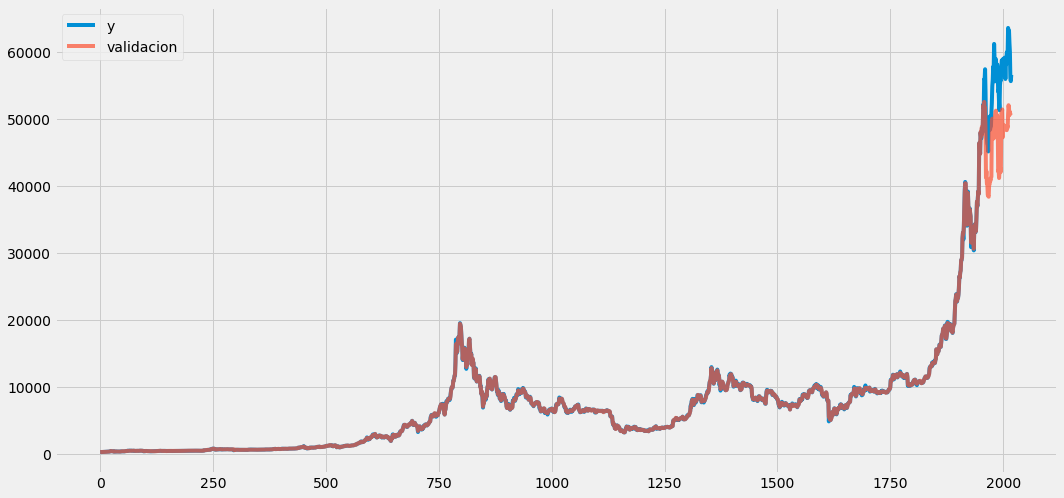

In [493]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [494]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6694.749


0          1            2   ...         44        45   46
0 -10.879821 -48.011662  1580.346680  ... -19.056911 -1.986295  0.0
1  -5.961016  30.116114  1593.684570  ...  -8.562017 -0.593953  0.0
2  30.230503  54.789948   551.286499  ...   6.930743 -1.252496  0.0
3  24.781532 -33.281898   646.716675  ...  10.863902  3.810842  0.0
4  -5.415076  31.255850  1343.843750  ... -22.000406 -2.912171  0.0

[5 rows x 47 columns]

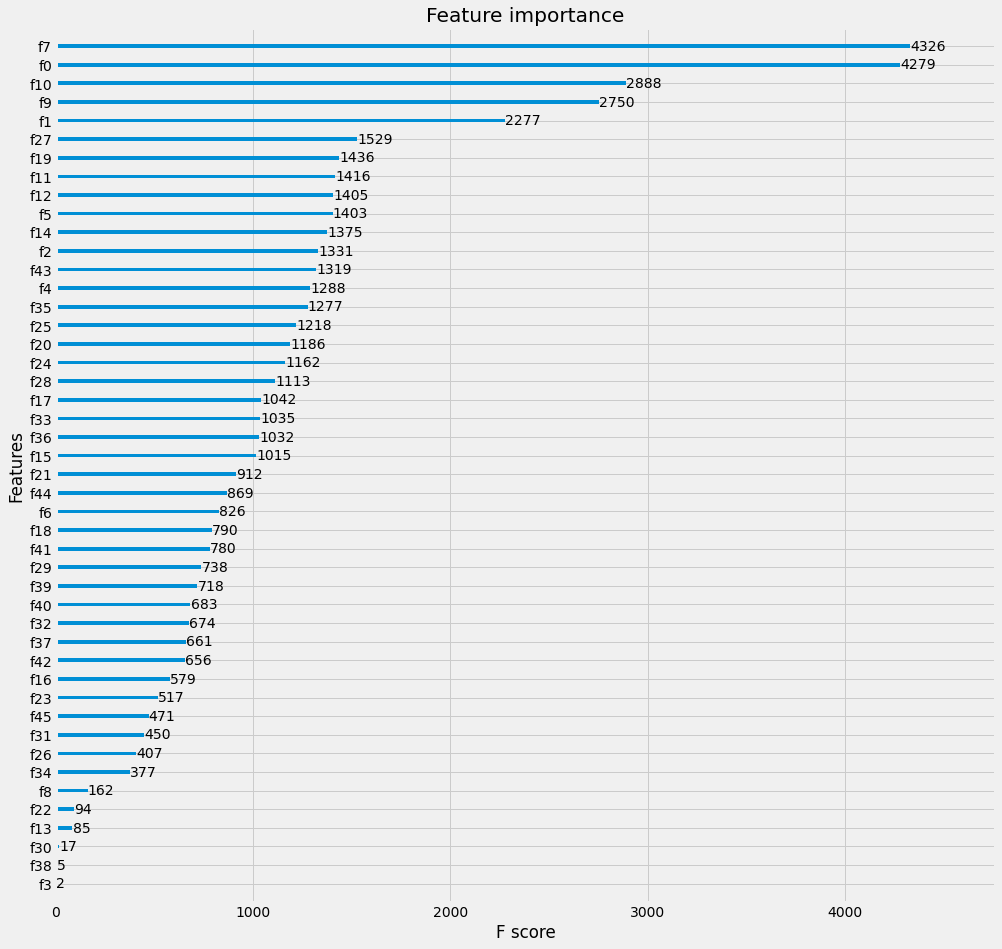

In [496]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

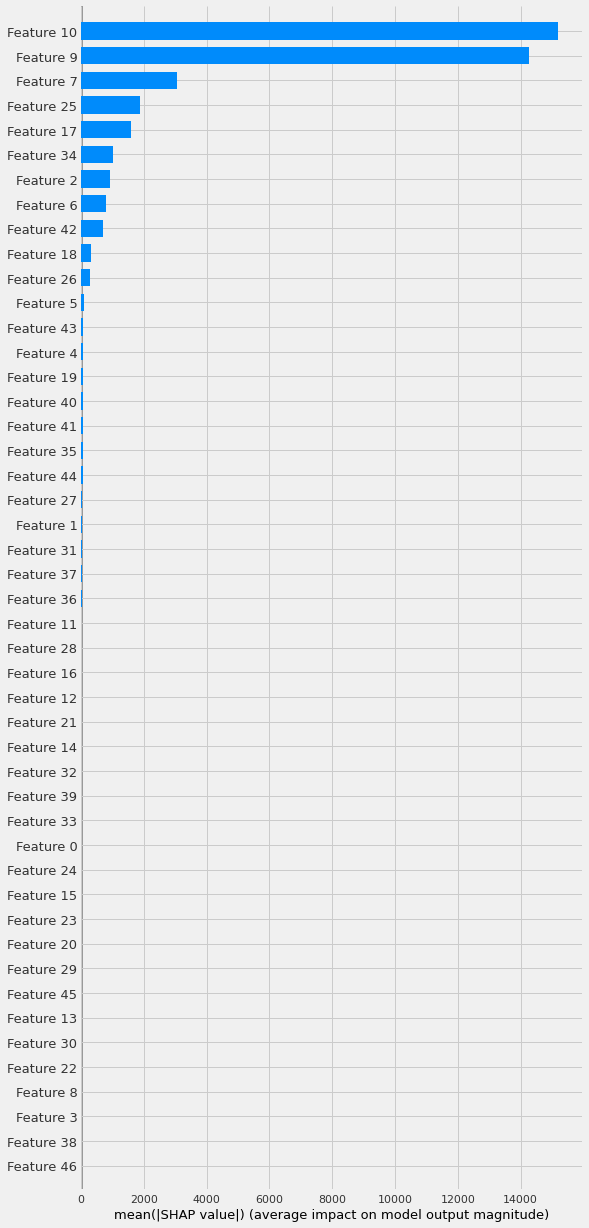

In [497]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

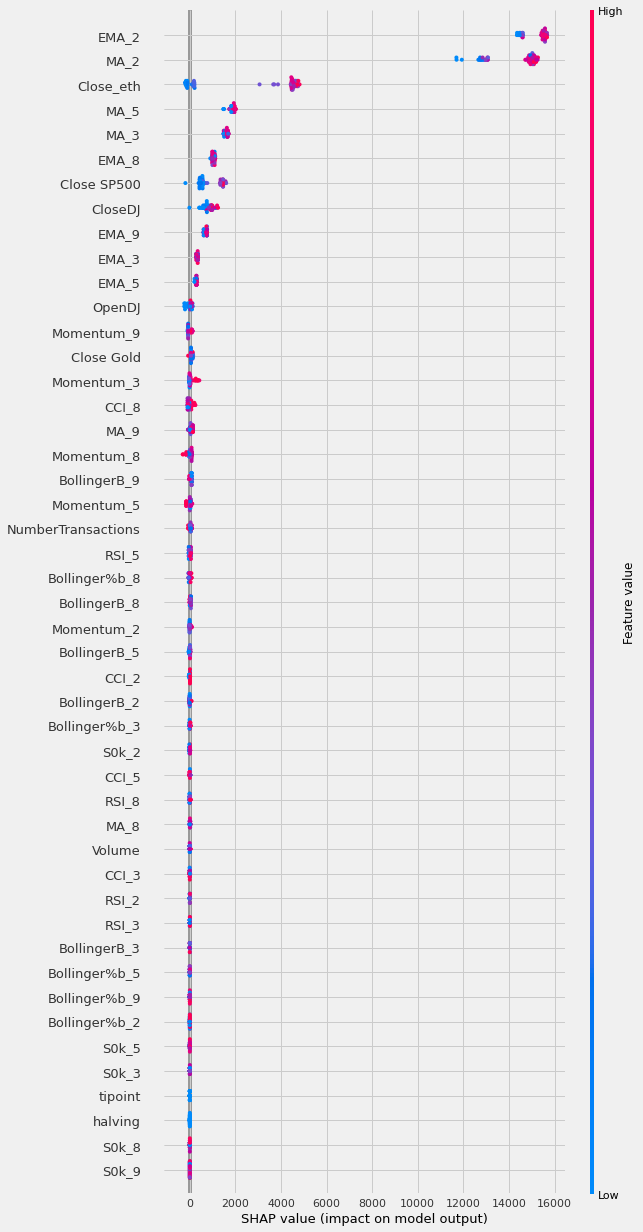

In [498]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [203]:
X

NumberTransactions  Close SP500  ...  dayofmonth  weekofyear
0                 104550         0.00  ...          11          41
1                 134410      2052.23  ...          12          42
2                 134878      2003.69  ...          13          42
3                 141985      1994.24  ...          14          42
4                 153495      2023.86  ...          15          42
...                  ...          ...  ...         ...         ...
2014             2639940      4185.47  ...          16          15
2015             2268816      4185.47  ...          17          15
2016             3444089      4185.47  ...          18          15
2017             2390527      4162.80  ...          19          16
2018             1750083      4162.80  ...          20          16

[2019 rows x 47 columns]

# XGBoost

In [251]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 109 columns]

In [503]:
X = df2.iloc[:, [11,10,8,26,18,1,2]]
y = df2.iloc[:, [0]]

In [504]:
X

EMA_2       MA_2  ...         Volume  NumberTransactions
0         0.000000      0.000  ...    3021.120000              104550
1         0.000000      0.000  ...    9493.890000              134410
2       248.075000    248.550  ...   12875.400000              134878
3       249.407692    248.800  ...   30115.770000              141985
4       251.832500    251.500  ...   50535.450000              153495
...            ...        ...  ...            ...                 ...
2014  63022.286415  63059.755  ...   91764.139884             2639940
2015  61897.295472  62247.390  ...   58912.256128             2268816
2016  60636.871824  60670.730  ...  124882.131824             3444089
2017  57645.630608  58078.335  ...   78229.042267             2390527
2018  56303.970203  55891.575  ...   60500.152593             1750083

[2019 rows x 7 columns]

In [505]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [506]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [507]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [508]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

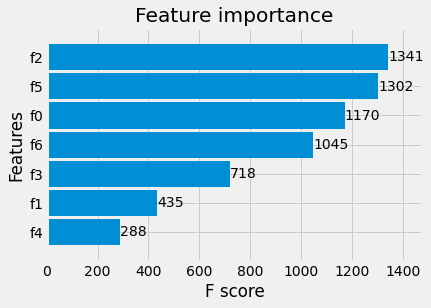

In [509]:
plot_importance(reg, height=0.9)

In [510]:
validacion = reg.predict(X_test)

In [511]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [512]:
validacion_p

validacion
0   55612.972656
1   55253.996094
2   54857.285156
3   46254.886719
4   43152.406250
5   42780.941406
6   40823.750000
7   39827.414062
8   39788.203125
9   39731.687500
10  39784.785156
11  40762.570312
12  42681.425781
13  42722.601562
14  41695.324219
15  43450.457031
16  51681.917969
17  55468.648438
18  55476.800781
19  55850.585938
20  54126.066406
21  55855.675781
22  55288.496094
23  55445.492188
24  55694.402344
25  55432.582031
26  54470.460938
27  55315.210938
28  55229.832031
29  55244.144531
30  47080.207031
31  47101.125000
32  46250.316406
33  45949.402344
34  47077.253906
35  45173.136719
36  45144.066406
37  55326.156250
38  53277.558594
39  54989.105469
40  53342.035156
41  53236.300781
42  53342.035156
43  53316.406250
44  55284.023438
45  55291.441406
46  55444.816406
47  53206.292969
48  53236.515625
49  55492.570312
50  55211.796875
51  55269.394531
52  55450.964844
53  55522.574219
54  55296.421875
55  55439.148438
56  55313.492188
57  55494.968750
58  55796.925781
59  55251.035156

In [513]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

28186400.882679358

In [514]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

4538.919783854168

In [515]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [516]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [517]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [518]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35111.8
[2]	Test-rmse:28366.4
[3]	Test-rmse:23453.2
[4]	Test-rmse:19793.2
[5]	Test-rmse:17219.8
[6]	Test-rmse:15252.1
[7]	Test-rmse:13231.9
[8]	Test-rmse:11618.1
[9]	Test-rmse:10398
[10]	Test-rmse:9542.54
[11]	Test-rmse:8784.13
[12]	Test-rmse:8131.29
[13]	Test-rmse:7882.97
[14]	Test-rmse:7390.94
[15]	Test-rmse:7004.1
[16]	Test-rmse:6676.72
[17]	Test-rmse:6407
[18]	Test-rmse:6188.59
[19]	Test-rmse:6010.13
[20]	Test-rmse:5851.71
[21]	Test-rmse:5726.4
[22]	Test-rmse:5617.5
[23]	Test-rmse:5532.07
[24]	Test-rmse:5453.91
[25]	Test-rmse:5423.23
[26]	Test-rmse:5372.24
[27]	Test-rmse:5332.02
[28]	Test-rmse:5291.86
[29]	Test-rmse:5258.28
[30]	Test-rmse:5257.62
[31]	Test-rmse:5258.9
[32]	Test-rmse:5256.65
[33]	Test-rmse:5253.48
[34]	Test-rmse:5252.02
[35]	Test-rmse:5243.25
[36]	Te

In [519]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 5243.25 with 36 rounds


In [520]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4715.870280      86.386309    4720.365560    158.609503
1      3325.234945      60.949263    3335.712321    119.508079
2      2346.575358      42.868537    2352.294027     87.019028
3      1655.841309      31.357717    1662.300008     67.353370
4      1169.583415      21.516933    1177.845215     54.977594
5       827.110331      14.825635     839.619263     47.292216
6       588.963420      10.583509     613.919617     36.713247
7       425.839773       7.234872     466.840668     30.502048
8       314.788198       5.701122     375.886912     28.189116
9       241.743266       4.959501     323.083557     24.294312
10      196.726486       4.327014     291.624217     20.482388
11      167.421112       4.612326     274.902675     17.224595
12      150.160156       4.481051     265.894694     15.262808
13      138.694295       5.229576     261.400971     13.588640
14      131.541107       5.758040     259.049408     12.554599
15      126.786184       6.260678     257.869390     12.104148
16      122.462204       6.580984     257.554952     11.297755
17      118.841820       6.780279     257.522090     10.668751
18      116.362892       6.850280     257.709671     10.548093
19      114.013364       6.885452     256.918727     10.351094
20      110.970245       7.636902     256.984517      9.829430
21      107.978185       7.731065     256.673691      9.409526
22      106.330299       7.624261     256.646805      9.253592
23      103.647611       7.868192     256.261693      9.040799
24      101.539990       8.334969     256.041331      8.680550
25       99.529340       8.599407     255.840851      8.638117
26       97.303233       8.295776     255.717997      8.668284
27       94.715390       9.453162     255.765040      8.586761
28       93.544599       9.616395     255.505498      8.386765
29       91.518263      10.472924     255.635651      8.108612
30       90.350889      10.477314     255.776398      8.013111
31       88.446531      10.797290     255.519908      7.673488
32       85.807678       9.924980     255.500972      7.978136
33       84.309514       8.993256     255.370855      8.279650
34       83.103971       9.516067     255.071635      8.210291
35       81.199522       8.729688     254.689738      8.194377
36       79.540896       8.517407     254.988230      8.296847
37       77.402718       7.516614     255.055267      8.603347
38       76.166484       6.892259     255.223618      8.472536
39       74.400808       7.782450     254.591670      7.903628
40       73.884370       7.761109     254.554042      7.880843

In [521]:
cv_results['test-mae-mean'].min()

254.55404166666668

In [522]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [523]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [524]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [525]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [526]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 251.02965400000002 for 19 rounds


In [527]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 251.02965400000002


In [528]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [529]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [530]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 251.02965400000002 for 19 rounds
CV with subsample=1.0, colsample=0.9
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [531]:
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8

In [532]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 246.8775208 for 17 rounds

CV with eta=0.2
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:10] WARNING: /workspace/src/objective/re

In [533]:
params['eta'] = 0.05

In [534]:
params['eval_metric'] = 'mae'

In [535]:
params

{'colsample_bytree': 0.8,
 'eta': 0.05,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.8}

In [536]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:53651.8
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:51911.1
[2]	Test-mae:50244.7
[3]	Test-mae:48533.6
[4]	Test-mae:47029.9
[5]	Test-mae:45642.2
[6]	Test-mae:44047.4
[7]	Test-mae:42650.2
[8]	Test-mae:41080.4
[9]	Test-mae:39598.8
[10]	Test-mae:38090.4
[11]	Test-mae:36826.3
[12]	Test-mae:35648.6
[13]	Test-mae:34717.4
[14]	Test-mae:33574.7
[15]	Test-mae:32382.7
[16]	Test-mae:31267.5
[17]	Test-mae:30310.5
[18]	Test-mae:29386.9
[19]	Test-mae:28484.6
[20]	Test-mae:27630.6
[21]	Test-mae:26837.4
[22]	Test-mae:25958.3
[23]	Test-mae:25229.9
[24]	Test-mae:24565.2
[25]	Test-mae:23875.3
[26]	Test-mae:23255.2
[27]	Test-mae:22626.3
[28]	Test-mae:22069.6
[29]	Test-mae:21494.8
[30]	Test-mae:20923.3
[31]	Test-mae:20288.1
[32]	Test-mae:19829.1
[33]	Test-mae:19345.9
[34]	Test-mae:18880.1
[35]	Test-mae:18467
[36]	Test-mae:18029.5
[37]	Test-mae:

In [537]:
dtrain2 = xgb.DMatrix(X_test)

In [538]:
validacion = best_model_Users.predict(dtrain2)

In [539]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [540]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

67229937.445625

In [541]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

7758.679270833334

In [542]:
y_pru = y_test

In [543]:
y_pru = y_pru.reset_index()

In [544]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

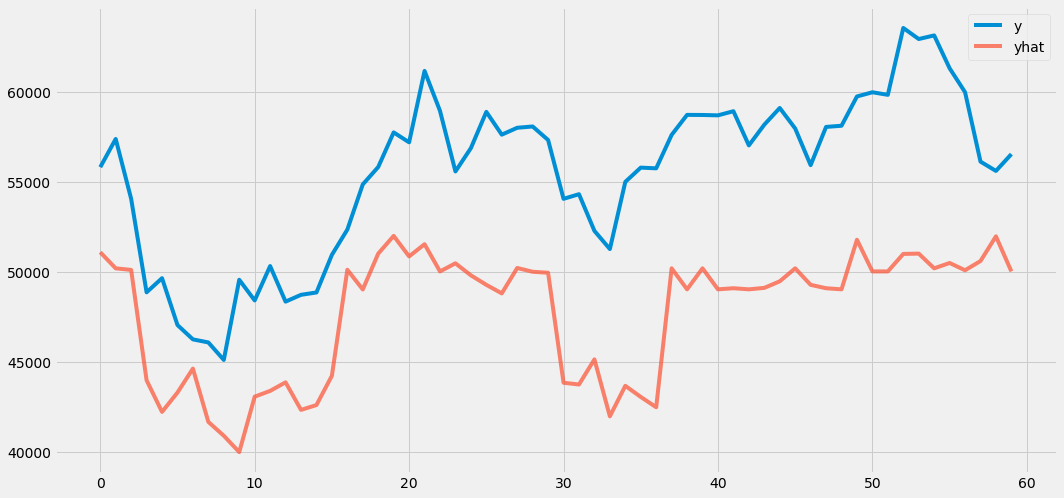

In [545]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [546]:
dtrain2 = xgb.DMatrix(scaled)

In [547]:
validacion = best_model_Users.predict(dtrain2)

In [548]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       254.949127
1       253.136475
2       253.945847
3       254.156418
4       257.627075
...            ...
2014  50520.566406
2015  50116.351562
2016  50628.878906
2017  51999.308594
2018  50051.484375

[2019 rows x 1 columns]

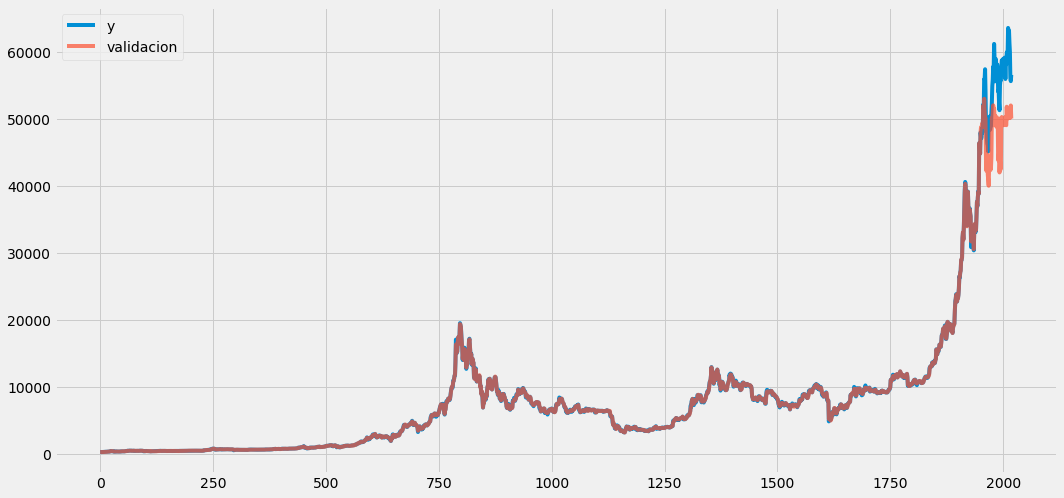

In [549]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [550]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6660.12


0            1            2  ...            4           5            6
0  25740.548828  6927.014160  4740.041016  ...  4223.551758  166.661377  1037.468384
1  25571.857422  6794.481934  4186.320801  ...  4206.817383   52.349350   915.412598
2  25524.130859  6864.979004  4083.397949  ...  4165.729492   23.010920  1262.484619
3  24285.187500  6530.770508   672.292236  ...  3323.647217   33.980816  1185.457520
4  24047.599609  6364.730469   371.655396  ...  3345.571777 -128.824432   126.766609

[5 rows x 7 columns]

In [551]:
df2.columns.values[[8,1,10,26]]

array(['Close_eth', 'Volume', 'MA_2', 'MA_5'], dtype=object)

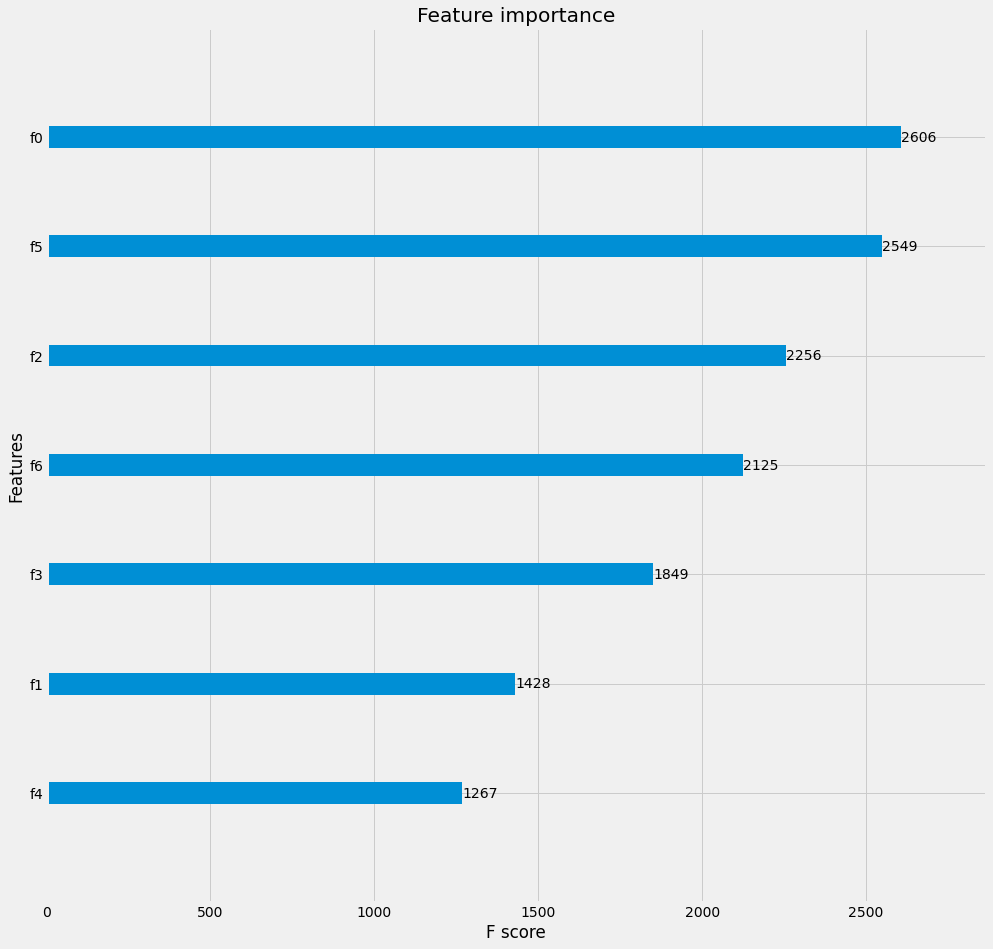

In [552]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

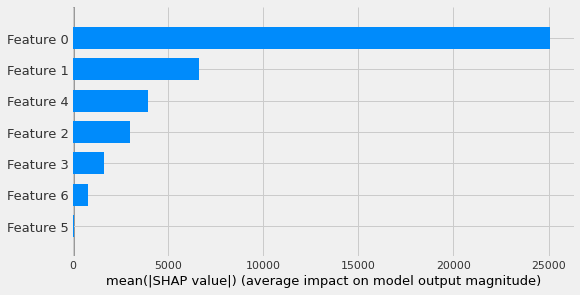

In [553]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

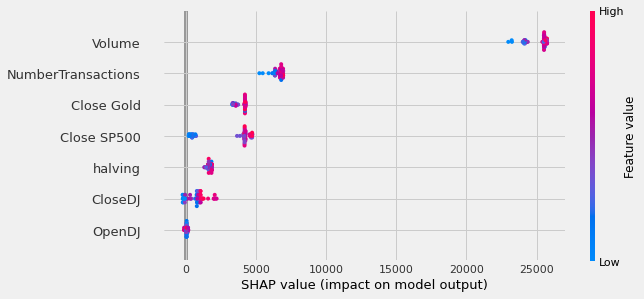

In [554]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [555]:
X

EMA_2       MA_2  ...         Volume  NumberTransactions
0         0.000000      0.000  ...    3021.120000              104550
1         0.000000      0.000  ...    9493.890000              134410
2       248.075000    248.550  ...   12875.400000              134878
3       249.407692    248.800  ...   30115.770000              141985
4       251.832500    251.500  ...   50535.450000              153495
...            ...        ...  ...            ...                 ...
2014  63022.286415  63059.755  ...   91764.139884             2639940
2015  61897.295472  62247.390  ...   58912.256128             2268816
2016  60636.871824  60670.730  ...  124882.131824             3444089
2017  57645.630608  58078.335  ...   78229.042267             2390527
2018  56303.970203  55891.575  ...   60500.152593             1750083

[2019 rows x 7 columns]

In [557]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


<Figure size 1080x1080 with 0 Axes>

In [558]:
list(df2)

['Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'OpenDJ',
 'CloseDJ',
 'Close_eth',
 'tipoint',
 'MA_2',
 'EMA_2',
 'Momentum_2',
 'BollingerB_2',
 'Bollinger%b_2',
 'S0k_2',
 'RSI_2',
 'CCI_2',
 'MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Momentum_5',
 'BollingerB_5',
 'Bollinger%b_5',
 'S0k_5',
 'RSI_5',
 'CCI_5',
 'MA_8',
 'EMA_8',
 'Momentum_8',
 'BollingerB_8',
 'Bollinger%b_8',
 'S0k_8',
 'RSI_8',
 'CCI_8',
 'MA_9',
 'EMA_9',
 'Momentum_9',
 'BollingerB_9',
 'Bollinger%b_9',
 'S0k_9',
 'RSI_9',
 'CCI_9',
 'MA_10',
 'EMA_10',
 'Momentum_10',
 'BollingerB_10',
 'Bollinger%b_10',
 'S0k_10',
 'RSI_10',
 'CCI_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'BollingerB_15',
 'Bollinger%b_15',
 'S0k_15',
 'RSI_15',
 'CCI_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'BollingerB_21',
 'Bollinger%b_21',
 'S0k_21',
 'RSI_21',
 'CCI_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'Bollin

# PCA de las medias

In [ ]:
# MA_300
# MA_200
# MA_105
# MA_21
# MA_15
# MA_10
# MA_9
# MA_8
# MA_5
# MA_2

In [559]:
media = pd.DataFrame()
media['MA_300'] = df2['MA_300']
media['MA_200'] = df2['MA_200']
media['MA_105'] = df2['MA_105']
media['MA_21'] = df2['MA_21']
media['MA_15'] = df2['MA_15']
media['MA_10'] = df2['MA_10']
media['MA_9'] = df2['MA_9']
media['MA_8'] = df2['MA_8']
media['MA_5'] = df2['MA_5']
media['MA_2'] = df2['MA_2']

In [563]:
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(media)
principal_comp

array([[-23387.86227759,   3158.08007438,   -338.13265902],
       [-23387.86227759,   3158.08007438,   -338.13265902],
       [-23297.17081294,   3198.86579229,   -242.97803703],
       ...,
       [149193.29140752,  -2462.20489686,  -3684.92110371],
       [147499.42212158,  -3542.96270925,  -5144.35087555],
       [145743.86552184,  -4615.62557412,  -6399.25244516]])

In [564]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1         pca2        pca3
0 -23387.862278  3158.080074 -338.132659
1 -23387.862278  3158.080074 -338.132659
2 -23297.170813  3198.865792 -242.978037
3 -23297.079592  3198.906816 -242.882327
4 -23296.094411  3199.349871 -241.848662

In [565]:
# Visualizar los clústeres con 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# XGBoost

In [567]:
X = pca_df
y = df2.iloc[:, [0]]

In [568]:
X

pca1         pca2         pca3
0     -23387.862278  3158.080074  -338.132659
1     -23387.862278  3158.080074  -338.132659
2     -23297.170813  3198.865792  -242.978037
3     -23297.079592  3198.906816  -242.882327
4     -23296.094411  3199.349871  -241.848662
...             ...          ...          ...
2014  148640.885669 -1691.156885 -2544.021218
2015  149228.085498 -1970.365301 -2962.524435
2016  149193.291408 -2462.204897 -3684.921104
2017  147499.422122 -3542.962709 -5144.350876
2018  145743.865522 -4615.625574 -6399.252445

[2019 rows x 3 columns]

In [569]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [570]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [571]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [572]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

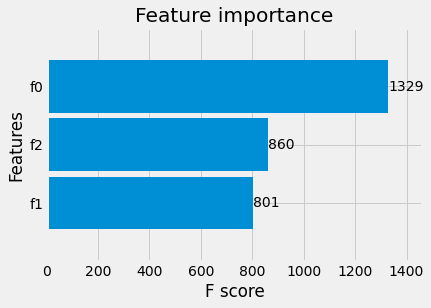

In [573]:
plot_importance(reg, height=0.9)

In [574]:
validacion = reg.predict(X_test)

In [575]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [576]:
validacion_p

validacion
0   53897.058594
1   54298.015625
2   54298.015625
3   54849.765625
4   54750.722656
5   51324.683594
6   48948.015625
7   47816.128906
8   47646.671875
9   47526.484375
10  47785.359375
11  48554.175781
12  48481.492188
13  48482.621094
14  48099.082031
15  48274.531250
16  48042.519531
17  48723.656250
18  50122.082031
19  50157.882812
20  52141.410156
21  54118.898438
22  55131.625000
23  55064.875000
24  54444.855469
25  51784.968750
26  52303.625000
27  51421.207031
28  49790.750000
29  49795.277344
30  48808.496094
31  47748.875000
32  48291.070312
33  49114.496094
34  49936.441406
35  49936.441406
36  49936.441406
37  49959.917969
38  49959.917969
39  50218.953125
40  50313.378906
41  50361.375000
42  50254.652344
43  50088.957031
44  50491.671875
45  50387.894531
46  50477.472656
47  50272.265625
48  50264.937500
49  49850.953125
50  49337.296875
51  49398.812500
52  49398.812500
53  50338.503906
54  50386.277344
55  51127.605469
56  49818.687500
57  50070.238281
58  50083.218750
59  50239.351562

In [577]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

45279157.820388794

In [578]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

5861.773684895835

In [579]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [580]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [581]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [582]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34114
[2]	Test-rmse:26801.1
[3]	Test-rmse:21454.2
[4]	Test-rmse:17625.1
[5]	Test-rmse:16447.1
[6]	Test-rmse:14257.7
[7]	Test-rmse:12311.3
[8]	Test-rmse:10747
[9]	Test-rmse:9568.41
[10]	Test-rmse:8815.8
[11]	Test-rmse:8120.1
[12]	Test-rmse:7447.29
[13]	Test-rmse:6903.44
[14]	Test-rmse:6466.63
[15]	Test-rmse:6117.71
[16]	Test-rmse:5840.23
[17]	Test-rmse:5620.25
[18]	Test-rmse:5446.15
[19]	Test-rmse:5308.4
[20]	Test-rmse:5199.31
[21]	Test-rmse:5112.72
[22]	Test-rmse:5043.8
[23]	Test-rmse:4988.74
[24]	Test-rmse:4944.56
[25]	Test-rmse:4908.97
[26]	Test-rmse:4880.15
[27]	Test-rmse:4856.71
[28]	Test-rmse:4837.57
[29]	Test-rmse:4843.33
[30]	Test-rmse:4840.66
[31]	Test-rmse:4825.1
[32]	Test-rmse:4830.22
[33]	Test-rmse:4817.35
[34]	Test-rmse:4820.53
[35]	Test-rmse:4820.52
[36]	Te

In [583]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 4795.72 with 38 rounds


In [584]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4714.688802      86.918702    4722.239258    171.310655
1      3324.512614      61.445364    3338.819987    126.735949
2      2350.408773      42.973987    2363.507243     96.665683
3      1663.541341      30.652893    1681.360433     75.901554
4      1181.285685      21.189043    1203.957519     62.926111
5       843.960246      14.985445     879.651347     54.519738
6       610.221415      11.886945     658.855143     41.786205
7       455.048594       8.920341     523.029439     39.684034
8       355.551127       4.766759     439.087962     35.061960
9       291.082204       2.797856     391.341176     34.634910
10      250.516159       3.116020     364.242696     30.509431
11      223.833735       2.733335     347.950378     26.707213
12      205.685013       2.608179     342.498281     26.443691
13      194.292430       1.454815     338.335866     26.866053
14      185.480530       2.138842     336.802551     25.789229
15      178.600805       1.986881     335.448578     25.117458
16      173.970260       2.630385     335.525269     23.918117
17      170.554754       2.895817     334.204966     23.639429
18      166.561941       3.678699     334.917216     23.703218
19      163.328512       4.434366     333.969279     22.692865
20      160.558716       5.060880     334.161499     22.426252
21      156.793167       5.904489     333.689952     21.391865
22      154.136180       5.546545     333.509928     21.421099
23      150.663020       7.172281     333.054026     20.520394
24      148.631582       7.332284     333.236297     20.316922
25      146.555517       7.684796     333.182770     20.893206
26      144.092357       8.293974     332.681274     20.952567
27      141.171427       9.136985     332.443654     21.558799

In [585]:
cv_results['test-mae-mean'].min()

332.4436543333333

In [586]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [587]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [588]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [589]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [590]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 299.0720582 for 37 rounds


In [591]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 299.0720582


In [592]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [593]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [594]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 299.0720582 for 37 rounds
CV with subsample=1.0, colsample=0.9
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34

In [596]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [597]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 299.0720582 for 37 rounds

CV with eta=0.2
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:14] WARNING: /workspace/src/objective/re

In [598]:
params['eta'] = 0.1

In [599]:
params['eval_metric'] = 'mae'

In [600]:
params

{'colsample_bytree': 1.0,
 'eta': 0.1,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [601]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:51743.6
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:48330.6
[2]	Test-mae:44493.3
[3]	Test-mae:41010.3
[4]	Test-mae:37885.6
[5]	Test-mae:35012.4
[6]	Test-mae:32404.5
[7]	Test-mae:30067.1
[8]	Test-mae:27915.6
[9]	Test-mae:26652.2
[10]	Test-mae:24858.6
[11]	Test-mae:23230.6
[12]	Test-mae:21752.8
[13]	Test-mae:20411.5
[14]	Test-mae:19194
[15]	Test-mae:18486.1
[16]	Test-mae:17476.9
[17]	Test-mae:16489.6
[18]	Test-mae:15984.4
[19]	Test-mae:15157.4
[20]	Test-mae:14404.9
[21]	Test-mae:13772.5
[22]	Test-mae:13144.6
[23]	Test-mae:12539.9
[24]	Test-mae:11988.1
[25]	Test-mae:11484.6
[26]	Test-mae:11047.8
[27]	Test-mae:10626.6
[28]	Test-mae:10242.2
[29]	Test-mae:9900.62
[30]	Test-mae:9591.23
[31]	Test-mae:9321.33
[32]	Test-mae:9224.34
[33]	Test-mae:9017.2
[34]	Test-mae:8816.78
[35]	Test-mae:8743.41
[36]	Test-mae:8568.7
[37]	Test-mae:85

In [602]:
dtrain2 = xgb.DMatrix(X_test)

In [603]:
validacion = best_model_Users.predict(dtrain2)

In [604]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [605]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

58245695.775678225

In [606]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6765.4041744791675

In [607]:
y_pru = y_test

In [608]:
y_pru = y_pru.reset_index()

In [609]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

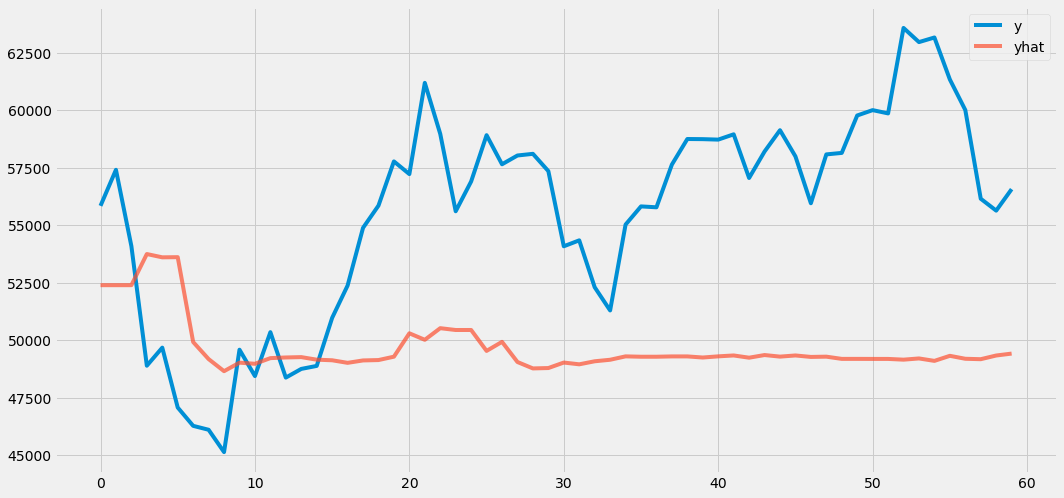

In [610]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [611]:
dtrain2 = xgb.DMatrix(scaled)

In [612]:
validacion = best_model_Users.predict(dtrain2)

In [613]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       254.426987
1       254.426987
2       256.322845
3       256.322845
4       258.440582
...            ...
2014  49320.863281
2015  49192.714844
2016  49174.097656
2017  49334.550781
2018  49418.226562

[2019 rows x 1 columns]

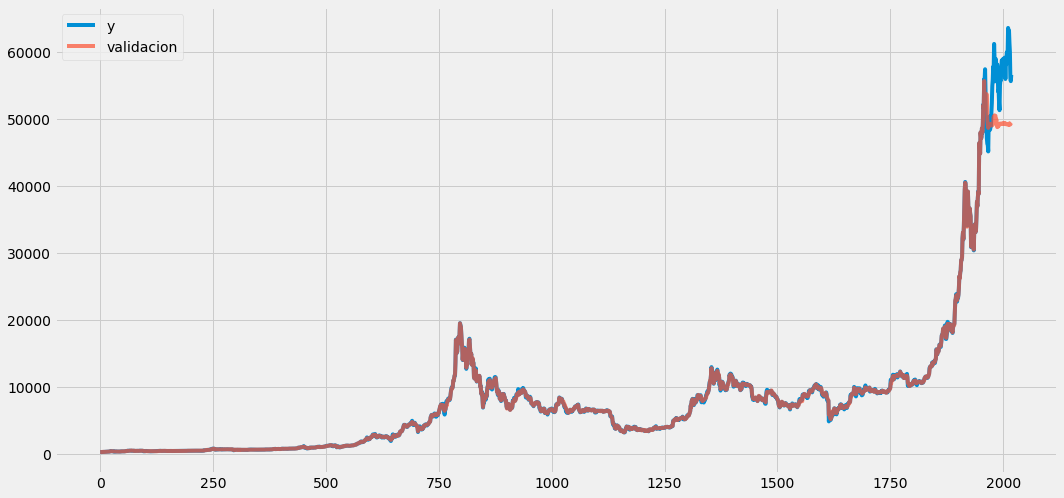

In [614]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [615]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6695.2


0            1           2
0  43357.421875  2885.623779 -545.909058
1  43357.421875  2885.623779 -545.909058
2  43357.421875  2885.623779 -545.909058
3  43458.914062  3138.061768  453.740875
4  44180.984375  2345.563232  381.167542

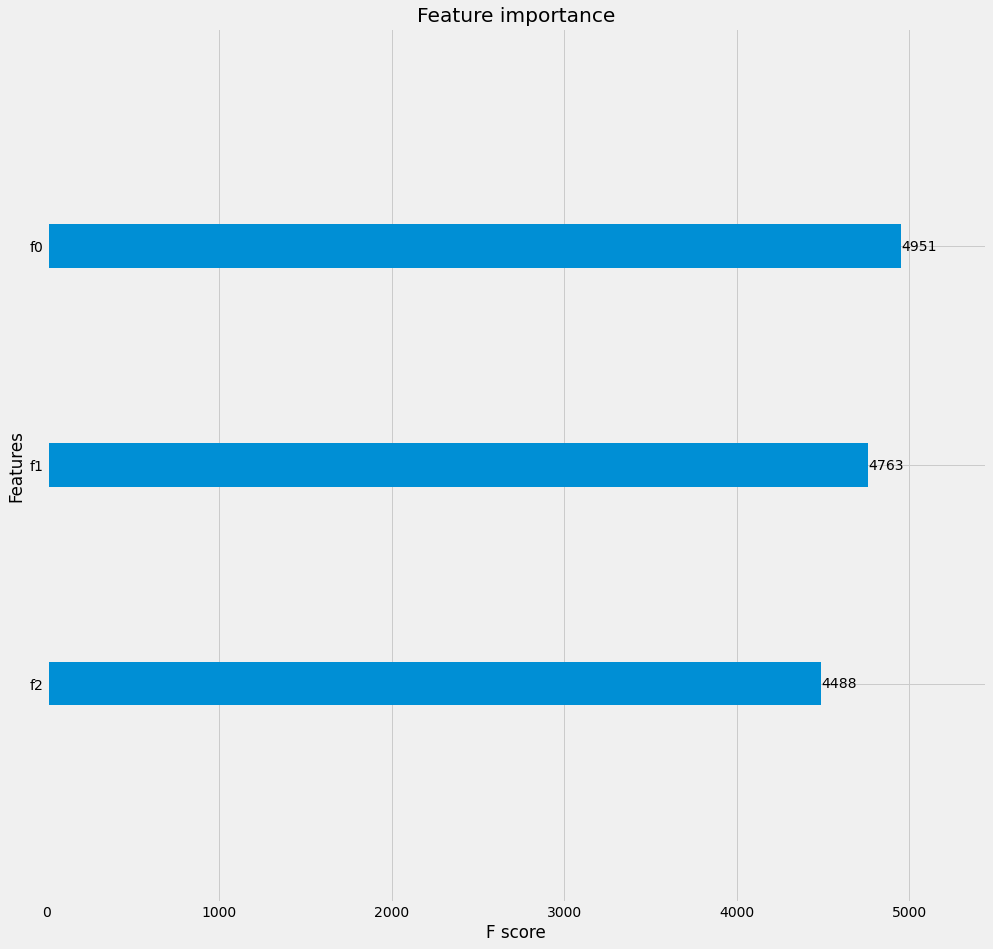

In [616]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

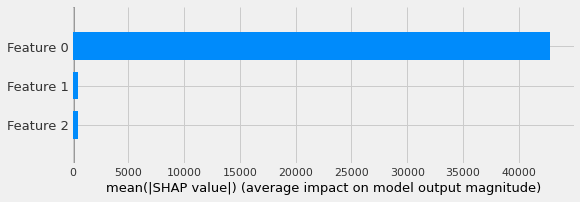

In [617]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

IndexError: ignored

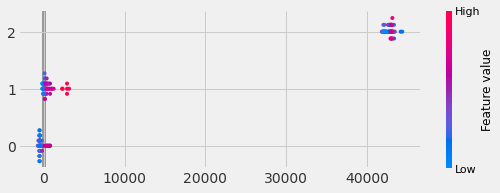

In [619]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=pca_df.columns.values[1:48])

In [ ]:
X

EMA_2       MA_2  ...         Volume  NumberTransactions
0         0.000000      0.000  ...    3021.120000              104550
1         0.000000      0.000  ...    9493.890000              134410
2       248.075000    248.550  ...   12875.400000              134878
3       249.407692    248.800  ...   30115.770000              141985
4       251.832500    251.500  ...   50535.450000              153495
...            ...        ...  ...            ...                 ...
2014  63022.286415  63059.755  ...   91764.139884             2639940
2015  61897.295472  62247.390  ...   58912.256128             2268816
2016  60636.871824  60670.730  ...  124882.131824             3444089
2017  57645.630608  58078.335  ...   78229.042267             2390527
2018  56303.970203  55891.575  ...   60500.152593             1750083

[2019 rows x 7 columns]

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


<Figure size 1080x1080 with 0 Axes>

In [ ]:
list(df2)

['Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'OpenDJ',
 'CloseDJ',
 'Close_eth',
 'tipoint',
 'MA_2',
 'EMA_2',
 'Momentum_2',
 'BollingerB_2',
 'Bollinger%b_2',
 'S0k_2',
 'RSI_2',
 'CCI_2',
 'MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Momentum_5',
 'BollingerB_5',
 'Bollinger%b_5',
 'S0k_5',
 'RSI_5',
 'CCI_5',
 'MA_8',
 'EMA_8',
 'Momentum_8',
 'BollingerB_8',
 'Bollinger%b_8',
 'S0k_8',
 'RSI_8',
 'CCI_8',
 'MA_9',
 'EMA_9',
 'Momentum_9',
 'BollingerB_9',
 'Bollinger%b_9',
 'S0k_9',
 'RSI_9',
 'CCI_9',
 'MA_10',
 'EMA_10',
 'Momentum_10',
 'BollingerB_10',
 'Bollinger%b_10',
 'S0k_10',
 'RSI_10',
 'CCI_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'BollingerB_15',
 'Bollinger%b_15',
 'S0k_15',
 'RSI_15',
 'CCI_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'BollingerB_21',
 'Bollinger%b_21',
 'S0k_21',
 'RSI_21',
 'CCI_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'Bollin